# Lead School Report, Supervised Learning In Action
By Mahfuz Miah, January 2020

Prelude: Assignment is described as the following:
First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

## 1. Synopsis

Data taken from: 

Lead Testing in School Drinking Water Sampling and Results: Most Recently Reported Beginning 2016
Link: https://healthdata.gov/dataset/lead-testing-school-drinking-water-sampling-and-results-most-recently-reported-beginning

Combined with:
NYS Education Department Data
Link: https://data.nysed.gov/downloads.php
- SRC2018: This database contains accountability, annual assessment, and staff data for the state as well as by county, Need to Resource Capacity group, district, public school, and charter school.
- STUDED2018: This database contains free and reduced-price lunch, average class size, student attendance and suspensions, staff counts, teacher attendance, and teacher turnover data.
- ENROLL2018: This database contains school, district, county, and statewide enrollment by grade, race/ethnicity, gender, and other groups.

Files were downloaded and opened in Microsoft Access; files were then converted to CSV text files and saved with new names that could then be opened here on Python. Relavent paths to files noted in the code.
All files have BEDS (Basic Educational Data System) code so the dataframes can by joined on this common column when appropriate.




## 2. Background


Lead is a metal with great utility due to its unique properties. It is found in a variety of products: it has served as additive in gasoline until 1995 which continues to serve as a major source of lead pollution since lead does not degrade over time. It was also present in many interior paints which posed a risk to children who would someimtes ingest chipped paint. Lead can also be present in pipes and plumbing fittings, which makes drinking water a route of lead exposure. Other industries such as battery production or lead welding can exposure workers in an occupational setting. 

The toxic properties of lead have been known for centures though more recent research has informed us of the toxic results of chronic low dose exposure to lead. This is particularly worrisome for children who are exposed to lead since exposure during the developmental stage has longer lasting effects. Deposition in bone and accelerating of the skeletal structure suggests premature onset of osteoporosis. Hormonal imbalances can also occur. Most importantly however, are the neurological implications of lead exposure. Various injuries can occur but the outcomes of cognitive deficit and intellectual disability are the more worrisome. Though lead exposure is heavily regulated by government agencies, exposure to lead is still a public health risk. 

We have been able to compile a list of schools of New York State and acquire data on whether the school has lead in the drinking water. We have combined this data with data measuring school outcomes; this dataset contains many features, mostly dealing with demographics, which may also help in making a model predictive of school outcome.

## 3. Understanding and Preparing the Data Set


In [1]:
#Libraries:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import statistics
from pandas import DataFrame
import datetime
import seaborn as sns
from sklearn import linear_model
from sqlalchemy import create_engine
from sklearn import linear_model
from fractions import Fraction
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import normaltest
import math
from textwrap import wrap
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

# set up the figure size

%matplotlib inline

In [2]:
# Set up the data
# Link: https://healthdata.gov/dataset/lead-testing-school-drinking-water-sampling-and-results-most-recently-reported-beginning
# Lead Testing in School Drinking Water Sampling and Results: Most Recently Reported Beginning 2016

def setdata(filename):
    df = pd.read_csv(filename)
    
    # Strip and make column names lowercase so that they are easy to manage. 
    df.columns = df.columns.str.strip().str.lower()

    # Replace characters or remove spaces and make all words lowercase.
    df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

    return df

In [3]:
# define all paths to necessary csv/txt files
lead_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Capstone/Lead_Testing.csv'
elem_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Capstone/Elementary.txt'
hs_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Capstone/HighSchool.txt'
dem_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Capstone/DemographicFactors.txt'
lunch_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Capstone/FreeReducedPriceLunch.txt'
ins_path = '/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/Capstone/InstitutionGrouping.txt'

In [4]:
# set up all the dataframes from all the csv/txt files
lead_df = setdata(lead_path) # df with info on lead content in schools
elem_df = setdata(elem_path) # df on list of elementary schools and composite score (performance of school)
hs_df = setdata(hs_path) # df on list of high schools schools and composite score (performance of school)
dem_df = setdata(dem_path) # df on demographic data of schools
lunch_df = setdata(lunch_path)# df on free or reduced lunch status of students
ins_df = setdata(ins_path) # df on institution data for school or entity

# make a list of all the dataframes
list_dfs = [lead_df,elem_df,hs_df,dem_df,lunch_df,ins_df]

# make a list of all the names of the dataframes in string format
str_list_dfs = ['lead_df','elem_df','hs_df','dem_df','lunch_df','ins_df']

We will do a .head() for all the dfs we just made to take a quick look through the contents:

In [5]:
lead_df.head()

school_district                                             school  \
0  BOCES No District Name                                     SULLIVAN BOCES   
1  BOCES No District Name  WSWHE BOCES MEYERS EDUCATIONAL CENTER MAIN BUI...   
2  HAMBURG CENTRAL SCHOOL                                        HAMBURG SHS   
3    LYONS CENTRAL SCHOOL                            LYONS ELEMENTARY SCHOOL   
4   MEDINA CENTRAL SCHOOL                                 OAK ORCHARD SCHOOL   

       county type_of_organization  number_of_outlets  \
0    Sullivan         BOCES School                NaN   
1  Washington         BOCES School                NaN   
2        Erie        Public School              104.0   
3       Wayne        Public School               29.0   
4     Orleans        Public School              115.0   

  any_buildings_with_lead-free_plumbing?  previously_sampled_outlets  \
0                                     No                         NaN   
1                                     No                         NaN   
2                                     No                         0.0   
3                                     No                         0.0   
4                                     No                         0.0   

   outlets_waiver_requested  waivers_granted  \
0                       NaN              NaN   
1                       NaN              NaN   
2                       0.0              0.0   
3                       0.0              0.0   
4                       0.0              0.0   

   outlets_sampled_after_regulation  ...                   school_website  \
0                               NaN  ...                              NaN   
1                               NaN  ...                              NaN   
2                             104.0  ...  hamburg central school district   
3                               0.0  ...                 www.lyonscsd.org   
4                             115.0  ...                    medinacsd.org   

      beds_code     school_street       school_city school_state  \
0  599000000000       6 WIERK AVE           LIBERTY           NY   
1  649000000006   15 HENNING ROAD  SARATOGA SPRINGS           NY   
2  141601060007         LEGION DR           HAMBURG           NY   
3  650501040001    98 WILLIAMS ST             LYONS           NY   
4  450801060002  W OAK ORCHARD ST            MEDINA           NY   

  school_zip_code date_sampling_updated date_results_updated  \
0           12754                   NaN                  NaN   
1           12866                   NaN           11/29/2018   
2           14075            12/02/2016           11/07/2016   
3           14489            12/03/2016           12/03/2016   
4           14103            11/22/2016           09/28/2018   

           county_location                                           location  
0  (41.705166, -74.711705)  6 WIERK AVE\nLIBERTY, NY 12754\n(41.795377, -7...  
1  (43.289513, -73.454761)  15 HENNING ROAD\nSARATOGA SPRINGS, NY 12866\n(...  
2  (42.888143, -78.795544)                       LEGION DR\nHAMBURG, NY 14075  
3  (43.144336, -77.117995)  98 WILLIAMS ST\nLYONS, NY 14489\n(43.065833, -...  
4  (43.248394, -78.218438)                 W OAK ORCHARD ST\nMEDINA, NY 14103  

[5 rows x 27 columns]

In [6]:
elem_df.head()

entity_cd                  entity_name  year   subject  \
0  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
1  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
2  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
3  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
4  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   

                                     subgroup_name core_cohort core_index  \
0                                     All Students        7998       84.9   
1                       Students with Disabilities        1178       54.4   
2                 American Indian or Alaska Native          50         70   
3  Asian or Native Hawaiian/Other Pacific Islander         756      106.7   
4                        Black or African American        3771       63.3   

  weighted_cohort weighted_index composite_level override override_weighted  \
0            9112           74.5               1      NaN               NaN   
1            1447           44.3               2      NaN               NaN   
2              66             53               1      NaN               NaN   
3             767          105.1               2      NaN               NaN   
4            4306           55.4               1      NaN               NaN   

  override_core  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [7]:
hs_df.head()

entity_cd                  entity_name  year   subject  \
0  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
1  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
2  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
3  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   
4  10100010000  ALBANY CITY SCHOOL DISTRICT  2018  Combined   

                                     subgroup_name composite_cohort  \
0                                     All Students             2152   
1                       Students with Disabilities              284   
2                 American Indian or Alaska Native               12   
3  Asian or Native Hawaiian/Other Pacific Islander              200   
4                        Black or African American             1052   

  composite__index composite__level override  
0            146.5                1      NaN  
1             79.1                1      NaN  
2                s                s      NaN  
3            165.6                2      NaN  
4            132.9                1      NaN

In [8]:
dem_df.head()

entity_cd         entity_name  year  num_ell  per_ell  num_am_ind  \
0    3000000       BROOME County  2017      487        2          74   
1    4000000  CATTARAUGUS County  2017       23        0         776   
2    5000000       CAYUGA County  2017       50        1          18   
3    6000000   CHAUTAUQUA County  2017      636        3         189   
4    7000000      CHEMUNG County  2017       46        0          23   

   per_am_ind  num_black  per_black  num_hisp  ...  num_ecdis  per_ecdis  \
0           0       2370          9      1693  ...      14110         55   
1           6        241          2       330  ...       7053         56   
2           0        308          3       335  ...       4609         51   
3           1        396          2      2567  ...      10442         57   
4           0        925          8       286  ...       5967         54   

   num_migrant  per_migrant  num_homeless  per_homeless  num_foster  \
0          NaN          NaN           NaN           NaN         NaN   
1          NaN          NaN           NaN           NaN         NaN   
2          NaN          NaN           NaN           NaN         NaN   
3          NaN          NaN           NaN           NaN         NaN   
4          NaN          NaN           NaN           NaN         NaN   

   per_foster  num_armed  per_armed  
0         NaN        NaN        NaN  
1         NaN        NaN        NaN  
2         NaN        NaN        NaN  
3         NaN        NaN        NaN  
4         NaN        NaN        NaN  

[5 rows x 33 columns]

In [9]:
lunch_df.head()

entity_cd                                  entity_name  year  \
0          1                           NYC Public Schools  2018   
1          2                                 Large Cities  2018   
2          3  High Need/Resource Urban-Suburban Districts  2018   
3          4           High Need/Resource Rural Districts  2018   
4          5                       Average Need Districts  2018   

   num_free_lunch  per_free_lunch  num_reduced_lunch  per_reduced_lunch  
0          670164              72              37424                  4  
1           81038              79               1004                  1  
2          141728              69               8723                  4  
3           72007              51               9301                  7  
4          241901              33              35802                  5

What constitutes a free lunch or reduced lunch?
Link: https://frac.org/school-meal-eligibility-reimbursements
- 130% of poverty level and below - free lunch
- 185%  to 130% of poverty level  - reduced lunch

In [10]:
ins_df.head()

group_code             group_name     entity_cd         entity_name
0           1           Total Public  111111111111  All Public Schools
1           2  County Public Schools       1000000       ALBANY County
2           2  County Public Schools       2000000     ALLEGANY County
3           2  County Public Schools       3000000       BROOME County
4           2  County Public Schools       4000000  CATTARAUGUS County

In [11]:
# Let's take a quick look at how large these dfs are in terms of rows and columns
for a, x in zip(str_list_dfs, list_dfs):
    print (f'Dataframe {a} is {x.shape} in shape')

Dataframe lead_df is (4682, 27) in shape
Dataframe elem_df is (40380, 13) in shape
Dataframe hs_df is (15995, 9) in shape
Dataframe dem_df is (16570, 33) in shape
Dataframe lunch_df is (16570, 7) in shape
Dataframe ins_df is (5522, 4) in shape


In [12]:
# we have data for a variety of subgroups. We want to start looking at All Students first, and only from 2018.
allelem_df = elem_df[elem_df['subgroup_name']=='All Students']
allelem_df1 = allelem_df.copy()
allelem_df1 = allelem_df1[allelem_df1['year'] == 2018]

# here, we also make sure that entity_cd is a str to match with other tables that also feature this column
# this column will be the column by which we join all dataframes
allelem_df1['entity_cd'] = allelem_df1['entity_cd'].apply(str)

# take a look at the dataframe
allelem_df1.head()

entity_cd                     entity_name  year   subject subgroup_name  \
0   10100010000     ALBANY CITY SCHOOL DISTRICT  2018  Combined  All Students   
10  10100010014        MONTESSORI MAGNET SCHOOL  2018  Combined  All Students   
20  10100010016    PINE HILLS ELEMENTARY SCHOOL  2018  Combined  All Students   
30  10100010018       DELAWARE COMMUNITY SCHOOL  2018  Combined  All Students   
40  10100010019  NEW SCOTLAND ELEMENTARY SCHOOL  2018  Combined  All Students   

   core_cohort core_index weighted_cohort weighted_index composite_level  \
0         7998       84.9            9112           74.5               1   
10         263      166.2             307          142.3               3   
20         403      109.2             403          109.2               2   
30         429       81.5             445           78.5               1   
40         482      129.1             558          111.6               2   

   override override_weighted override_core  
0       NaN               NaN           NaN  
10      NaN               NaN           NaN  
20      NaN               NaN           NaN  
30      NaN               NaN           NaN  
40      NaN               NaN           NaN

In [13]:
# here, we repeat the process for the hs dataframe as we did for the elementary dataframe:
# we have data for a variety of subgroups. We want to start looking at All Students first, and only from 2018
# here, we also make sure that entity_cd is a str to match with other tables that also feature this column

allhs_df = hs_df[hs_df['subgroup_name']=='All Students']
allhs_df1 = allhs_df.copy()
allhs_df1 = allhs_df1[allhs_df1['year'] == 2018]
allhs_df1['entity_cd'] = allhs_df1['entity_cd'].apply(str)

# take a look at the dataframe
allhs_df1.head()

entity_cd                                      entity_name  year  \
0   10100010000                      ALBANY CITY SCHOOL DISTRICT  2018   
9   10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS  2018   
18  10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT  2018   
25  10100010034                               ALBANY HIGH SCHOOL  2018   
35  10100860907                   GREEN TECH HIGH CHARTER SCHOOL  2018   

     subject subgroup_name composite_cohort composite__index composite__level  \
0   Combined  All Students             2152            146.5                1   
9   Combined  All Students              232            158.4                2   
18  Combined  All Students              300            185.5                3   
25  Combined  All Students             2112            147.9                2   
35  Combined  All Students              188            161.1                2   

   override  
0       NaN  
9       NaN  
18      NaN  
25      NaN  
35      NaN

In [14]:
# here, I take a quick look at the columns and their types for the elem dataframe
allelem_df1.dtypes

entity_cd            object
entity_name          object
year                  int64
subject              object
subgroup_name        object
core_cohort          object
core_index           object
weighted_cohort      object
weighted_index       object
composite_level      object
override             object
override_weighted    object
override_core        object
dtype: object

In [15]:
# here, I take a quick look at the columns and their types for the hs dataframe
allhs_df1.dtypes

entity_cd           object
entity_name         object
year                 int64
subject             object
subgroup_name       object
composite_cohort    object
composite__index    object
composite__level    object
override            object
dtype: object

In [16]:
# we will drop some columns that will not be used for building our dataframe of all schools
# the override columns are artifacts of the file we made from the original source files
# weighted columns are not present for the highschool colummns so we will stick to the composite columns we have
allelem_df2 = allelem_df1.copy()
allelem_df2 = allelem_df2.drop(['weighted_cohort',
                                'weighted_index',
                                'override',
                                'override_weighted',
                                'override_core'],axis=1)

In [17]:
# we rename some of the columns to account for naming convention differences
# more information on the different naming schemes is found here: 
# http://www.p12.nysed.gov/accountability/essa/documents/UnderstandingNYSAccountabilitySystemUnderESSA_2018-19F.pdf
# in summary, core_cohort and core_index in the elementary dataframe is synonymous with composite_cohort 
# and composite_index

# we rename some of the columns, dealing with extra underscores
allelem_df3 = allelem_df2.copy()
allelem_df3 = allelem_df3.rename(columns={'core_index':'composite_index',
                                          'core_cohort':'composite_cohort'})

In [18]:
# we rename some of the columns, dealing with extra underscores
allhs_df2 = allhs_df1.copy()
allhs_df2 = allhs_df1.rename(columns={'composite__index':'composite_index',
                                      'composite__level':'composite_level'})

In [19]:
# we will drop some columns that will not be used for building our dataframe of all schools
# the override columns are artifacts of the file we made from the original source files
# weighted columns are not present for the highschool colummns so we will stick to the composite columns we have
allhs_df3 = allhs_df2.copy()
allhs_df3 = allhs_df3.drop(['override'],axis=1)

In [20]:
# proof by inspection
allhs_df3.dtypes

entity_cd           object
entity_name         object
year                 int64
subject             object
subgroup_name       object
composite_cohort    object
composite_index     object
composite_level     object
dtype: object

In [21]:
allelem_df3.dtypes

entity_cd           object
entity_name         object
year                 int64
subject             object
subgroup_name       object
composite_cohort    object
composite_index     object
composite_level     object
dtype: object

In [22]:
allschools_df = pd.concat([allhs_df3, allelem_df3], sort=False)
allschools_df

entity_cd                                      entity_name  year  \
0       10100010000                      ALBANY CITY SCHOOL DISTRICT  2018   
9       10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS  2018   
18      10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT  2018   
25      10100010034                               ALBANY HIGH SCHOOL  2018   
35      10100860907                   GREEN TECH HIGH CHARTER SCHOOL  2018   
...             ...                                              ...   ...   
40336  680601060002                           PENN YAN MIDDLE SCHOOL  2018   
40346  680601060005                       PENN YAN ELEMENTARY SCHOOL  2018   
40355  680801040000                   DUNDEE CENTRAL SCHOOL DISTRICT  2018   
40364  680801040001                 DUNDEE JUNIOR-SENIOR HIGH SCHOOL  2018   
40372  680801040002                         DUNDEE ELEMENTARY SCHOOL  2018   

        subject subgroup_name composite_cohort composite_index composite_level  
0      Combined  All Students             2152           146.5               1  
9      Combined  All Students              232           158.4               2  
18     Combined  All Students              300           185.5               3  
25     Combined  All Students             2112           147.9               2  
35     Combined  All Students              188           161.1               2  
...         ...           ...              ...             ...             ...  
40336  Combined  All Students              555           136.6               2  
40346  Combined  All Students              620           144.3               3  
40355  Combined  All Students              608           124.9               2  
40364  Combined  All Students              198           111.6               2  
40372  Combined  All Students              406           132.4               3  

[6465 rows x 8 columns]

We have properly concatinated our dataframes.

In [23]:
# Let's take a quick look at how large these dfs are in terms of rows and columns
str_list_df1 = ['allhs_df3', 'allelem_df3', 'allschools_df']
list_df1 = [allhs_df3, allelem_df3, allschools_df]

for a, x in zip(str_list_df1, list_df1):
    print (f'Dataframe {a} is {x.shape} in shape')
    
print(f'Sum of the rows of the elem and hs dataframes should be: {list_df1[0].shape[0] + list_df1[1].shape[0]}')

Dataframe allhs_df3 is (1943, 8) in shape
Dataframe allelem_df3 is (4522, 8) in shape
Dataframe allschools_df is (6465, 8) in shape
Sum of the rows of the elem and hs dataframes should be: 6465


In [24]:
# let's review the dataframes we are working with again
str_list_dfs

['lead_df', 'elem_df', 'hs_df', 'dem_df', 'lunch_df', 'ins_df']

In [25]:
# we have taken care of elem_df and hs_df and we are leaving lead_df for last. Next up: dem_df
# this df looked big from when we ran dem_df.shape. Let's see if there are results from multiple years
dem_df.year.value_counts()

2016    5540
2018    5515
2017    5515
Name: year, dtype: int64

In [26]:
# We will only take the results from 2018. Make a new dataframe to reflect this.
dem_df1 = dem_df[dem_df.year == 2018].copy()
dem_df1.shape

(5515, 33)

In [27]:
dem_df1['entity_cd'] = dem_df1['entity_cd'].apply(str)

In [28]:
# merge allschools_df with dem_df into compiled dataframe.
comp_df = pd.merge(
    allschools_df, 
    dem_df1, 
    on='entity_cd',
    left_index = True,
    how = 'inner')
comp_df

entity_cd                                    entity_name_x  year_x  \
11144   10100010000                      ALBANY CITY SCHOOL DISTRICT    2018   
11144   10100010000                      ALBANY CITY SCHOOL DISTRICT    2018   
11167   10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS    2018   
11168   10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT    2018   
11168   10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT    2018   
...             ...                                              ...     ...   
16558  671201060001                          PERRY ELEMENTARY SCHOOL    2018   
16561  671501040001                         WARSAW ELEMENTARY SCHOOL    2018   
16565  680601060002                           PENN YAN MIDDLE SCHOOL    2018   
16566  680601060005                       PENN YAN ELEMENTARY SCHOOL    2018   
16569  680801040002                         DUNDEE ELEMENTARY SCHOOL    2018   

        subject subgroup_name composite_cohort composite_index  \
11144  Combined  All Students             2152           146.5   
11144  Combined  All Students             7998            84.9   
11167  Combined  All Students              232           158.4   
11168  Combined  All Students              300           185.5   
11168  Combined  All Students              754           140.1   
...         ...           ...              ...             ...   
16558  Combined  All Students              449           141.1   
16561  Combined  All Students              352           150.3   
16565  Combined  All Students              555           136.6   
16566  Combined  All Students              620           144.3   
16569  Combined  All Students              406           132.4   

      composite_level                                    entity_name_y  \
11144               1                      ALBANY CITY SCHOOL DISTRICT   
11144               1                      ALBANY CITY SCHOOL DISTRICT   
11167               2  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS   
11168               3      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT   
11168               3      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT   
...               ...                                              ...   
16558               3                          PERRY ELEMENTARY SCHOOL   
16561               3                         WARSAW ELEMENTARY SCHOOL   
16565               2                           PENN YAN MIDDLE SCHOOL   
16566               3                       PENN YAN ELEMENTARY SCHOOL   
16569               3                         DUNDEE ELEMENTARY SCHOOL   

       year_y  ...  num_ecdis  per_ecdis  num_migrant  per_migrant  \
11144    2018  ...       6327         70         21.0          0.0   
11144    2018  ...       6327         70         21.0          0.0   
11167    2018  ...        317         89          0.0          0.0   
11168    2018  ...        303         40          0.0          0.0   
11168    2018  ...        303         40          0.0          0.0   
...       ...  ...        ...        ...          ...          ...   
16558    2018  ...        211         52          2.0          0.0   
16561    2018  ...        193         53          2.0          1.0   
16565    2018  ...        164         55          0.0          0.0   
16566    2018  ...        381         63          2.0          0.0   
16569    2018  ...        229         68          0.0          0.0   

       num_homeless  per_homeless  num_foster  per_foster  num_armed  \
11144         377.0           4.0         0.0         0.0        0.0   
11144         377.0           4.0         0.0         0.0        0.0   
11167          39.0          11.0         0.0         0.0        0.0   
11168           0.0           0.0         1.0         0.0        0.0   
11168           0.0           0.0         1.0         0.0        0.0   
...             ...           ...         ...         ...        ...   
16558           9.0   

In [29]:
#List of unique values in the df['name'] column
def uniqueval(df):
    column_names = list(df.columns.values)
    for column_name in column_names:
        print("There are " + str(df[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")


In [30]:
uniqueval(allschools_df)

There are 5269 unique values in column 'entity_cd'.
There are 5206 unique values in column 'entity_name'.
There are 1 unique values in column 'year'.
There are 1 unique values in column 'subject'.
There are 1 unique values in column 'subgroup_name'.
There are 1835 unique values in column 'composite_cohort'.
There are 1632 unique values in column 'composite_index'.
There are 5 unique values in column 'composite_level'.


In [31]:
# Select duplicate rows except first occurrence based on all columns
# background for .duplicated():
# https://thispointer.com/...
# ...pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

def showdups (dfObj, column=None): # dfObj is some dataframe that you want to parse
    if (column == None):
        column = dfObj.columns
    duplicateRowsDF = dfObj[dfObj.duplicated(column, keep = False)] 
    print("Duplicate Rows except first occurrence based on all columns are :")
    return (duplicateRowsDF)

In [32]:
# are there duplicates on allhs_df3?
showdups(allhs_df3, 'entity_cd').sort_values(by=['entity_cd'])

Duplicate Rows except first occurrence based on all columns are :


Empty DataFrame
Columns: [entity_cd, entity_name, year, subject, subgroup_name, composite_cohort, composite_index, composite_level]
Index: []

In [33]:
# are there duplicates on allelem_df3?
showdups(allelem_df3, 'entity_cd').sort_values(by=['entity_cd'])

Duplicate Rows except first occurrence based on all columns are :


Empty DataFrame
Columns: [entity_cd, entity_name, year, subject, subgroup_name, composite_cohort, composite_index, composite_level]
Index: []

In [34]:
# are there duplicates on allschools_df?
showdups(allschools_df,'entity_cd').sort_values(by=['entity_cd'])

Duplicate Rows except first occurrence based on all columns are :


entity_cd                            entity_name  year   subject  \
1379  100308020000   BERKSHIRE UNION FREE SCHOOL DISTRICT  2018  Combined   
3106  100308020000   BERKSHIRE UNION FREE SCHOOL DISTRICT  2018  Combined   
1384  100308020001    BERKSHIRE JUNIOR-SENIOR HIGH SCHOOL  2018  Combined   
3112  100308020001    BERKSHIRE JUNIOR-SENIOR HIGH SCHOOL  2018  Combined   
1389  100501040000  TACONIC HILLS CENTRAL SCHOOL DISTRICT  2018  Combined   
...            ...                                    ...   ...       ...   
3028   91101060005                 PERU JR/SR HIGH SCHOOL  2018  Combined   
3038   91200010000       PLATTSBURGH CITY SCHOOL DISTRICT  2018  Combined   
1344   91200010000       PLATTSBURGH CITY SCHOOL DISTRICT  2018  Combined   
1362   91402060000        SARANAC CENTRAL SCHOOL DISTRICT  2018  Combined   
3077   91402060000        SARANAC CENTRAL SCHOOL DISTRICT  2018  Combined   

     subgroup_name composite_cohort composite_index composite_level  
1379  All Students               12               s               s  
3106  All Students                8               s               s  
1384  All Students               12               s               s  
3112  All Students                8               s               s  
1389  All Students              432           172.3               2  
...            ...              ...             ...             ...  
3028  All Students              374           134.1               2  
3038  All Students              863           136.7               2  
1344  All Students              576           176.3               2  
1362  All Students              476           188.2               3  
3077  All Students             1006           141.8               2  

[2392 rows x 8 columns]

We incorrectly put our schools together. Let's merge the elem and hs dfs instead, giving precedence to the highschool values since it will incorporate the middle school scores.

In [35]:
# concatinate the dfs but drop duplicates coming from allelem_df3
allschools_df1 = pd.concat([allhs_df3, allelem_df3], sort=False).drop_duplicates('entity_cd').reset_index(drop=True)
allschools_df1

entity_cd                                      entity_name  year  \
0      10100010000                      ALBANY CITY SCHOOL DISTRICT  2018   
1      10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS  2018   
2      10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT  2018   
3      10100010034                               ALBANY HIGH SCHOOL  2018   
4      10100860907                   GREEN TECH HIGH CHARTER SCHOOL  2018   
...            ...                                              ...   ...   
5264  671201060001                          PERRY ELEMENTARY SCHOOL  2018   
5265  671501040001                         WARSAW ELEMENTARY SCHOOL  2018   
5266  680601060002                           PENN YAN MIDDLE SCHOOL  2018   
5267  680601060005                       PENN YAN ELEMENTARY SCHOOL  2018   
5268  680801040002                         DUNDEE ELEMENTARY SCHOOL  2018   

       subject subgroup_name composite_cohort composite_index composite_level  
0     Combined  All Students             2152           146.5               1  
1     Combined  All Students              232           158.4               2  
2     Combined  All Students              300           185.5               3  
3     Combined  All Students             2112           147.9               2  
4     Combined  All Students              188           161.1               2  
...        ...           ...              ...             ...             ...  
5264  Combined  All Students              449           141.1               3  
5265  Combined  All Students              352           150.3               3  
5266  Combined  All Students              555           136.6               2  
5267  Combined  All Students              620           144.3               3  
5268  Combined  All Students              406           132.4               3  

[5269 rows x 8 columns]

In [36]:
dem_df1.columns

Index(['entity_cd', 'entity_name', 'year', 'num_ell', 'per_ell', 'num_am_ind',
       'per_am_ind', 'num_black', 'per_black', 'num_hisp', 'per_hisp',
       'num_asian', 'per_asian', 'num_white', 'per_white', 'num_multi',
       'per_multi', 'num_swd', 'per_swd', 'num_female', 'per_female',
       'num_male', 'per_male', 'num_ecdis', 'per_ecdis', 'num_migrant',
       'per_migrant', 'num_homeless', 'per_homeless', 'num_foster',
       'per_foster', 'num_armed', 'per_armed'],
      dtype='object')

In [37]:
# merge allschools_df with dem_df1.
merged_df = pd.merge(
    allschools_df1, 
    dem_df1, 
    on= ('entity_cd', 'entity_name', 'year'),
    left_index = False,
    how = 'inner')
merged_df

entity_cd                                      entity_name  year  \
0      10100010000                      ALBANY CITY SCHOOL DISTRICT  2018   
1      10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS  2018   
2      10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT  2018   
3      10100010034                               ALBANY HIGH SCHOOL  2018   
4      10100860907                   GREEN TECH HIGH CHARTER SCHOOL  2018   
...            ...                                              ...   ...   
5263  671201060001                          PERRY ELEMENTARY SCHOOL  2018   
5264  671501040001                         WARSAW ELEMENTARY SCHOOL  2018   
5265  680601060002                           PENN YAN MIDDLE SCHOOL  2018   
5266  680601060005                       PENN YAN ELEMENTARY SCHOOL  2018   
5267  680801040002                         DUNDEE ELEMENTARY SCHOOL  2018   

       subject subgroup_name composite_cohort composite_index composite_level  \
0     Combined  All Students             2152           146.5               1   
1     Combined  All Students              232           158.4               2   
2     Combined  All Students              300           185.5               3   
3     Combined  All Students             2112           147.9               2   
4     Combined  All Students              188           161.1               2   
...        ...           ...              ...             ...             ...   
5263  Combined  All Students              449           141.1               3   
5264  Combined  All Students              352           150.3               3   
5265  Combined  All Students              555           136.6               2   
5266  Combined  All Students              620           144.3               3   
5267  Combined  All Students              406           132.4               3   

      num_ell  per_ell  ...  num_ecdis  per_ecdis  num_migrant  per_migrant  \
0        1078       12  ...       6327         70         21.0          0.0   
1          33        9  ...        317         89          0.0          0.0   
2           0        0  ...        303         40          0.0          0.0   
3         301       11  ...       1679         64          5.0          0.0   
4           0        0  ...        252         71          0.0          0.0   
...       ...      ...  ...        ...        ...          ...          ...   
5263        7        2  ...        211         52          2.0          0.0   
5264        5        1  ...        193         53          2.0          1.0   
5265        0        0  ...        164         55          0.0          0.0   
5266        8        1  ...        381         63          2.0          0.0   
5267        0        0  ...        229         68          0.0          0.0   

      num_homeless  per_homeless  num_foster  per_foster  num_armed  per_armed  
0            377.0           4.0         0.0         0.0        0.0        0.0  
1             39.0          11.0         0.0         0.0        0.0        0.0  
2              0.0           0.0         1.0         0.0        0.0        0.0  
3             78.0           3.0         0.0         0.0        0.0        0.0  
4              5.0           1.0         0.0         0.0        0.0        0.0  
...            ...           ...         ...         ...        ...        ...  
5263           9.0           2.0         1.0         0.0        0.0        0.0  
5264           2.0           1.0         1.0         0.0        0.0        0.0  
5265           5.0           2.0         0.0         0.0        0.0        0.0  
5266          14.0           2.0         1.0         0.0        1.0        0.0  
5267           4.0           1.0         0.0         0.0        0.0        0.0  

[5268 rows x 38 columns]

In [38]:
# let's review the dataframes we are working with again
str_list_dfs

['lead_df', 'elem_df', 'hs_df', 'dem_df', 'lunch_df', 'ins_df']

In [39]:
lunch_df.columns

Index(['entity_cd', 'entity_name', 'year', 'num_free_lunch', 'per_free_lunch',
       'num_reduced_lunch', 'per_reduced_lunch'],
      dtype='object')

In [40]:
# we have taken care of elem_df and hs_df and we are leaving lead_df for last. Next up: dem_df
# this df looked big from when we ran dem_df.shape. Let's see if there are results from multiple years
lunch_df.year.value_counts()

2016    5540
2018    5515
2017    5515
Name: year, dtype: int64

In [41]:
# We will only take the results from 2018. Make a new dataframe to reflect this.
lunch_df1 = lunch_df[lunch_df.year == 2018].copy()
lunch_df1.shape

(5515, 7)

In [42]:
lunch_df1['entity_cd'] = lunch_df1['entity_cd'].apply(str)

In [43]:
# merge merged_df with lunch_df.
merged_df1 = pd.merge(
    merged_df, 
    lunch_df1, 
    on= ('entity_cd', 'entity_name', 'year'),
    left_index = False,
    how = 'inner')
merged_df1

entity_cd                                      entity_name  year  \
0      10100010000                      ALBANY CITY SCHOOL DISTRICT  2018   
1      10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS  2018   
2      10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT  2018   
3      10100010034                               ALBANY HIGH SCHOOL  2018   
4      10100860907                   GREEN TECH HIGH CHARTER SCHOOL  2018   
...            ...                                              ...   ...   
5262  671201060001                          PERRY ELEMENTARY SCHOOL  2018   
5263  671501040001                         WARSAW ELEMENTARY SCHOOL  2018   
5264  680601060002                           PENN YAN MIDDLE SCHOOL  2018   
5265  680601060005                       PENN YAN ELEMENTARY SCHOOL  2018   
5266  680801040002                         DUNDEE ELEMENTARY SCHOOL  2018   

       subject subgroup_name composite_cohort composite_index composite_level  \
0     Combined  All Students             2152           146.5               1   
1     Combined  All Students              232           158.4               2   
2     Combined  All Students              300           185.5               3   
3     Combined  All Students             2112           147.9               2   
4     Combined  All Students              188           161.1               2   
...        ...           ...              ...             ...             ...   
5262  Combined  All Students              449           141.1               3   
5263  Combined  All Students              352           150.3               3   
5264  Combined  All Students              555           136.6               2   
5265  Combined  All Students              620           144.3               3   
5266  Combined  All Students              406           132.4               3   

      num_ell  per_ell  ...  num_homeless  per_homeless  num_foster  \
0        1078       12  ...         377.0           4.0         0.0   
1          33        9  ...          39.0          11.0         0.0   
2           0        0  ...           0.0           0.0         1.0   
3         301       11  ...          78.0           3.0         0.0   
4           0        0  ...           5.0           1.0         0.0   
...       ...      ...  ...           ...           ...         ...   
5262        7        2  ...           9.0           2.0         1.0   
5263        5        1  ...           2.0           1.0         1.0   
5264        0        0  ...           5.0           2.0         0.0   
5265        8        1  ...          14.0           2.0         1.0   
5266        0        0  ...           4.0           1.0         0.0   

      per_foster  num_armed  per_armed  num_free_lunch  per_free_lunch  \
0            0.0        0.0        0.0            6220              69   
1            0.0        0.0        0.0             293              82   
2            0.0        0.0        0.0             241              32   
3            0.0        0.0        0.0            1645              63   
4            0.0        0.0        0.0             231              65   
...          ...        ...        ...             ...             ...   
5262         0.0        0.0        0.0             178              44   
5263         0.0        0.0        0.0             173              48   
5264         0.0        0.0        0.0             135              45   
5265         0.0        1.0        0.0             333              55   
5266         0.0        0.0        0.0             190              56   

      num_reduced_lunch  per_reduced_lunch  
0                    77                  1  
1                    31                  9  
2                    47                  6  
3                    33                  1  
4                    10                  3  
...                 ...                ...  
5262                 26                  6  
5263     

In [44]:
ins_df.columns

Index(['group_code', 'group_name', 'entity_cd', 'entity_name'], dtype='object')

In [45]:
ins_df['entity_cd'] = ins_df['entity_cd'].apply(str)

In [46]:
# merge merged_df with lunch_df.
merged_df2 = pd.merge(
    merged_df1, 
    ins_df, 
    on= ('entity_cd','entity_name'),
    left_index = False,
    how = 'inner')
merged_df2

entity_cd                                      entity_name  year  \
0      10100010000                      ALBANY CITY SCHOOL DISTRICT  2018   
1      10100860960  ALBANY LEADERSHIP CHARTER HIGH SCHOOL FOR GIRLS  2018   
2      10201040000      BERNE-KNOX-WESTERLO CENTRAL SCHOOL DISTRICT  2018   
3      10100010034                               ALBANY HIGH SCHOOL  2018   
4      10100860907                   GREEN TECH HIGH CHARTER SCHOOL  2018   
...            ...                                              ...   ...   
5262  671201060001                          PERRY ELEMENTARY SCHOOL  2018   
5263  671501040001                         WARSAW ELEMENTARY SCHOOL  2018   
5264  680601060002                           PENN YAN MIDDLE SCHOOL  2018   
5265  680601060005                       PENN YAN ELEMENTARY SCHOOL  2018   
5266  680801040002                         DUNDEE ELEMENTARY SCHOOL  2018   

       subject subgroup_name composite_cohort composite_index composite_level  \
0     Combined  All Students             2152           146.5               1   
1     Combined  All Students              232           158.4               2   
2     Combined  All Students              300           185.5               3   
3     Combined  All Students             2112           147.9               2   
4     Combined  All Students              188           161.1               2   
...        ...           ...              ...             ...             ...   
5262  Combined  All Students              449           141.1               3   
5263  Combined  All Students              352           150.3               3   
5264  Combined  All Students              555           136.6               2   
5265  Combined  All Students              620           144.3               3   
5266  Combined  All Students              406           132.4               3   

      num_ell  per_ell  ...  num_foster  per_foster  num_armed  per_armed  \
0        1078       12  ...         0.0         0.0        0.0        0.0   
1          33        9  ...         0.0         0.0        0.0        0.0   
2           0        0  ...         1.0         0.0        0.0        0.0   
3         301       11  ...         0.0         0.0        0.0        0.0   
4           0        0  ...         0.0         0.0        0.0        0.0   
...       ...      ...  ...         ...         ...        ...        ...   
5262        7        2  ...         1.0         0.0        0.0        0.0   
5263        5        1  ...         1.0         0.0        0.0        0.0   
5264        0        0  ...         0.0         0.0        0.0        0.0   
5265        8        1  ...         1.0         0.0        1.0        0.0   
5266        0        0  ...         0.0         0.0        0.0        0.0   

      num_free_lunch  per_free_lunch  num_reduced_lunch  per_reduced_lunch  \
0               6220              69                 77                  1   
1                293              82                 31                  9   
2                241              32                 47                  6   
3               1645              63                 33                  1   
4                231              65                 10                  3   
...              ...             ...                ...                ...   
5262             178              44                 26                  6   
5263             173              48                 18                  5   
5264             135              45                 18                  6   
5265             333              55                 30                  5   
5266             190              56                 26                  8   

      group_code              group_name  
0              5  Public School District  
1              6           Public School  
2              5  Public School District  
3              6           Public School  
4              6           Public 

In [47]:
# does our final merged df have any duplicates? let's check
showdups(merged_df2,'entity_cd')

Duplicate Rows except first occurrence based on all columns are :


Empty DataFrame
Columns: [entity_cd, entity_name, year, subject, subgroup_name, composite_cohort, composite_index, composite_level, num_ell, per_ell, num_am_ind, per_am_ind, num_black, per_black, num_hisp, per_hisp, num_asian, per_asian, num_white, per_white, num_multi, per_multi, num_swd, per_swd, num_female, per_female, num_male, per_male, num_ecdis, per_ecdis, num_migrant, per_migrant, num_homeless, per_homeless, num_foster, per_foster, num_armed, per_armed, num_free_lunch, per_free_lunch, num_reduced_lunch, per_reduced_lunch, group_code, group_name]
Index: []

[0 rows x 44 columns]

merged_df2 will now be merged with our lead_df. We will check for missing values before feature engineering.

In [48]:
# define function that returns a dataframe with fraction and percent of missing 
# data for each column
def percent_missing (df):
    numer = df.isnull().sum() 
    denom = df.isnull().count()

    data= []
    i = 0
    for x,y in zip(numer,denom):
        data.append([numer.index[i],(Fraction(x,y)), x*100/y])
        i+=1
    
    df1 = pd.DataFrame(data,columns = ['Column_Name', 'Fraction of Missing Data','Percent'])
    return df1

# preview this function in action with our defined dataframe
percent_missing(lead_df)

Column_Name Fraction of Missing Data   Percent
0                          school_district                        0  0.000000
1                                   school                        0  0.000000
2                                   county                        0  0.000000
3                     type_of_organization                        0  0.000000
4                        number_of_outlets                  19/2341  0.811619
5   any_buildings_with_lead-free_plumbing?                        0  0.000000
6               previously_sampled_outlets                  19/2341  0.811619
7                 outlets_waiver_requested                  19/2341  0.811619
8                          waivers_granted                  19/2341  0.811619
9         outlets_sampled_after_regulation                  19/2341  0.811619
10                       sampling_complete                        0  0.000000
11                sampling_completion_date                  23/2341  0.982486
12      number_of_outlets,_result_≤_15_ppb                  34/2341  1.452371
13      number_of_outlets,_result_>_15_ppb                  37/2341  1.580521
14                          out_of_service                        0  0.000000
15                    all_results_received                        0  0.000000
16               date_all_results_received                  81/4682  1.730030
17                          school_website                  19/2341  0.811619
18                               beds_code                        0  0.000000
19                           school_street                   8/2341  0.341734
20                             school_city                   8/2341  0.341734
21                            school_state                   8/2341  0.341734
22                         school_zip_code                   9/2341  0.384451
23                   date_sampling_updated                  19/2341  0.811619
24                    date_results_updated                  67/4682  1.431012
25                         county_location                        0  0.000000
26                                location                        0  0.000000

In [49]:
# use above function to return dataframe containing only columns that have some missing data
def missing_data (df):
    missingdf = percent_missing(df)
    missingdf1 = missingdf[missingdf['Fraction of Missing Data'] > 0]
    print(f'{missingdf1.shape[0]} out of {missingdf.shape[0]} columns have missing data')
    return missingdf1

missing_data(lead_df)

16 out of 27 columns have missing data


Column_Name Fraction of Missing Data   Percent
4                    number_of_outlets                  19/2341  0.811619
6           previously_sampled_outlets                  19/2341  0.811619
7             outlets_waiver_requested                  19/2341  0.811619
8                      waivers_granted                  19/2341  0.811619
9     outlets_sampled_after_regulation                  19/2341  0.811619
11            sampling_completion_date                  23/2341  0.982486
12  number_of_outlets,_result_≤_15_ppb                  34/2341  1.452371
13  number_of_outlets,_result_>_15_ppb                  37/2341  1.580521
16           date_all_results_received                  81/4682  1.730030
17                      school_website                  19/2341  0.811619
19                       school_street                   8/2341  0.341734
20                         school_city                   8/2341  0.341734
21                        school_state                   8/2341  0.341734
22                     school_zip_code                   9/2341  0.384451
23               date_sampling_updated                  19/2341  0.811619
24                date_results_updated                  67/4682  1.431012

In [50]:
def num_col (df):
    numeric_columns = df.select_dtypes(['int64','float64']).columns
    print(f"The number of numerical columns is {len(numeric_columns)}")
    return numeric_columns

def non_num_col (df):
    non_numeric_columns = df.select_dtypes(['object']).columns
    print(f"The number of non-numerical columns is {len(non_numeric_columns)}")
    return non_numeric_columns


In [51]:
numeric_columns = num_col(lead_df)

The number of numerical columns is 7


In [52]:
non_numeric_columns = non_num_col(lead_df)

The number of non-numerical columns is 20


In [53]:
lead_df.columns

Index(['school_district', 'school', 'county', 'type_of_organization',
       'number_of_outlets', 'any_buildings_with_lead-free_plumbing?',
       'previously_sampled_outlets', 'outlets_waiver_requested',
       'waivers_granted', 'outlets_sampled_after_regulation',
       'sampling_complete', 'sampling_completion_date',
       'number_of_outlets,_result_≤_15_ppb',
       'number_of_outlets,_result_>_15_ppb', 'out_of_service',
       'all_results_received', 'date_all_results_received', 'school_website',
       'beds_code', 'school_street', 'school_city', 'school_state',
       'school_zip_code', 'date_sampling_updated', 'date_results_updated',
       'county_location', 'location'],
      dtype='object')

In [54]:
# we don't want all of these columns for our features so let's make a dataframe with only the columns we want
minilead_df = lead_df[[
    'beds_code', # same as entity_cd from previous sataframes
    'school_district',
    'school',
    'county',
    'school_city',
    'school_zip_code',
    'number_of_outlets,_result_≤_15_ppb', # this shows lead content that is properly below 15 ppb
    'number_of_outlets,_result_>_15_ppb', # this shows lead content that is improperly above 15 ppb
    'any_buildings_with_lead-free_plumbing?']] # shows proactive nature of entity in getting lead free plumbing 

# description of data compilation and keyword meanings are present at this link:
# https://www.governor.ny.gov/sites/governor.ny.gov/files/atoms/files/LeadTestingRegs.pdf
# source of data: https://health.data.ny.gov/Health/Lead-Testing-in-School-Drinking-Water-Sampling-and/rkyy-fsv9

In [55]:
minilead_df

beds_code                      school_district  \
0     599000000000               BOCES No District Name   
1     649000000006               BOCES No District Name   
2     141601060007               HAMBURG CENTRAL SCHOOL   
3     650501040001                 LYONS CENTRAL SCHOOL   
4     450801060002                MEDINA CENTRAL SCHOOL   
...            ...                                  ...   
4677  130801060002    HYDE PARK CENTRAL SCHOOL DISTRICT   
4678  280405020004      NEW HYDE PK-GARDEN CITY PK UFSD   
4679  580224030011            PATCHOGUE-MEDFORD U F SCH   
4680  580912060001  EASTPORT SOUTH MANOR CENTRAL SCHOOL   
4681          K207                              NYC DOE   

                                                 school      county  \
0                                        SULLIVAN BOCES    Sullivan   
1     WSWHE BOCES MEYERS EDUCATIONAL CENTER MAIN BUI...  Washington   
2                                           HAMBURG SHS        Erie   
3                               LYONS ELEMENTARY SCHOOL       Wayne   
4                                    OAK ORCHARD SCHOOL     Orleans   
...                                                 ...         ...   
4677                                  NETHERWOOD SCHOOL    Dutchess   
4678                            MANOR OAKS WM BOWIE SCH      Nassau   
4679                        SAXTON STREET MIDDLE SCHOOL     Suffolk   
4680                EASTPORT SOUTH MANOR CENTRAL JR SHS     Suffolk   
4681                                               K207       Kings   

           school_city school_zip_code  number_of_outlets,_result_≤_15_ppb  \
0              LIBERTY           12754                                 NaN   
1     SARATOGA SPRINGS           12866                               147.0   
2              HAMBURG           14075                                98.0   
3                LYONS           14489                                27.0   
4               MEDINA           14103                               110.0   
...                ...             ...                                 ...   
4677         HYDE PARK           12538                                68.0   
4678     NEW HYDE PARK           11040                                13.0   
4679         PATCHOGUE           11772                                37.0   
4680        MANORVILLE           11949                                60.0   
4681          Brooklyn           11234                                59.0   

      number_of_outlets,_result_>_15_ppb  \
0                                    NaN   
1                                   48.0   
2                                    6.0   
3                                    2.0   
4                                    5.0   
...                                  ...   
4677                                13.0   
4678                                 0.0   
4679                                 0.0   
4680                                 0.0   
4681                                 0.0   

     any_buildings_with_lead-free_plumbing?  
0                                        No  
1                                        No  
2                                        No  
3                                        No  
4                                        No  
...                                     ...  
4677                                     No  
4678                                     No  
4679                                     No  
4680                                     No  
4681                                     No  

[4682 rows x 9 columns]

In [56]:
# merge merged_df with minilead_df.
merged_df3 = pd.merge(
    merged_df2, # shape: 5267 * 45
    minilead_df, # shape: 4682 * 9
    left_on = 'entity_cd',
    right_on = 'beds_code',
    left_index = False,
    how = 'inner')
merged_df3

entity_cd                             entity_name  year   subject  \
0     100308020001     BERKSHIRE JUNIOR-SENIOR HIGH SCHOOL  2018  Combined   
1     100501040003  TACONIC HILLSJUNIOR/SENIOR HIGH SCHOOL  2018  Combined   
2     140201060002             AMHERST CENTRAL HIGH SCHOOL  2018  Combined   
3     100902040004    GERMANTOWN JUNIOR-SENIOR HIGH SCHOOL  2018  Combined   
4     101001040002                     CHATHAM HIGH SCHOOL  2018  Combined   
...            ...                                     ...   ...       ...   
2438  671201060001                 PERRY ELEMENTARY SCHOOL  2018  Combined   
2439  671501040001                WARSAW ELEMENTARY SCHOOL  2018  Combined   
2440  680601060002                  PENN YAN MIDDLE SCHOOL  2018  Combined   
2441  680601060005              PENN YAN ELEMENTARY SCHOOL  2018  Combined   
2442  680801040002                DUNDEE ELEMENTARY SCHOOL  2018  Combined   

     subgroup_name composite_cohort composite_index composite_level  num_ell  \
0     All Students               12               s               s        0   
1     All Students              424           174.4               3       10   
2     All Students              796           207.7               4       22   
3     All Students              224           189.5               3        1   
4     All Students              372           195.1               4        5   
...            ...              ...             ...             ...      ...   
2438  All Students              449           141.1               3        7   
2439  All Students              352           150.3               3        5   
2440  All Students              555           136.6               2        0   
2441  All Students              620           144.3               3        8   
2442  All Students              406           132.4               3        0   

      per_ell  ...     group_name     beds_code  \
0           0  ...  Public School  100308020001   
1           2  ...  Public School  100501040003   
2           3  ...  Public School  140201060002   
3           0  ...  Public School  100902040004   
4           1  ...  Public School  101001040002   
...       ...  ...            ...           ...   
2438        2  ...  Public School  671201060001   
2439        1  ...  Public School  671501040001   
2440        0  ...  Public School  680601060002   
2441        1  ...  Public School  680601060005   
2442        0  ...  Public School  680801040002   

                           school_district  \
0     BERKSHIRE UNION FREE SCHOOL DISTRICT   
1             TACONIC HILLS CENTRAL SCHOOL   
2                   AMHERST CENTRAL SCHOOL   
3       GERMANTOWN CENTRAL SCHOOL DISTRICT   
4          CHATHAM CENTRAL SCHOOL DISTRICT   
...                                    ...   
2438                  PERRY CENTRAL SCHOOL   
2439                 WARSAW CENTRAL SCHOOL   
2440               PENN YAN CENTRAL SCHOOL   
2441               PENN YAN CENTRAL SCHOOL   
2442                 DUNDEE CENTRAL SCHOOL   

                                    school    county  school_city  \
0      BERKSHIRE JUNIOR-SENIOR HIGH SCHOOL  Columbia       CANAAN   
1                        TACONIC HILLS SHS  Columbia   CRARYVILLE   
2                       AMHERST CENTRAL HS      Erie      AMHERST   
3     GERMANTOWN JUNIOR-SENIOR HIGH SCHOOL  Columbia   GERMANTOWN   
4                               CHATHAM HS  Columbia      CHATHAM   
...                                    ...       ...          ...   
2438               PERRY ELEMENTARY SCHOOL   Wyoming        PERRY   
2439                    WARSAW ELEM SCHOOL   Wyoming       WARSAW   
2440                PENN YAN MIDDLE SCHOOL     Yates         PENN   
2441                  PENN YAN ELEM SCHOOL     Yates         PENN   
2442                    DUNDEE ELEM SCHOOL     Yates       DUNDEE   

      school_zip_code  number_of_outlets,_result_≤_15_ppb  \
0               12029                                35

In [57]:
## TODO: check beds_code later if time permits; to answer why things were dropped

In [58]:
# do we have columns to clean due to missing data?
percent_missing(merged_df3)

Column_Name Fraction of Missing Data   Percent
0                                entity_cd                        0  0.000000
1                              entity_name                        0  0.000000
2                                     year                        0  0.000000
3                                  subject                        0  0.000000
4                            subgroup_name                        0  0.000000
5                         composite_cohort                        0  0.000000
6                          composite_index                        0  0.000000
7                          composite_level                        0  0.000000
8                                  num_ell                        0  0.000000
9                                  per_ell                        0  0.000000
10                              num_am_ind                        0  0.000000
11                              per_am_ind                        0  0.000000
12                               num_black                        0  0.000000
13                               per_black                        0  0.000000
14                                num_hisp                        0  0.000000
15                                per_hisp                        0  0.000000
16                               num_asian                        0  0.000000
17                               per_asian                        0  0.000000
18                               num_white                        0  0.000000
19                               per_white                        0  0.000000
20                               num_multi                        0  0.000000
21                               per_multi                        0  0.000000
22                                 num_swd                        0  0.000000
23                                 per_swd                        0  0.000000
24                              num_female                        0  0.000000
25                              per_female                        0  0.000000
26                                num_male                        0  0.000000
27                                per_male                        0  0.000000
28                               num_ecdis                        0  0.000000
29                               per_ecdis                        0  0.000000
30                             num_migrant                        0  0.000000
31                             per_migrant                        0  0.000000
32                            num_homeless                        0  0.000000
33                            per_homeless                        0  0.000000
34                              num_foster                        0  0.000000
35                              per_foster                        0  0.000000
36                               num_armed                        0  0.000000
37                               per_armed                        0  0.000000
38                          num_free_lunch                        0  0.000000
39                          per_free_lunch                        0  0.000000
40                       num_reduced_lunch                        0  0.000000
41                       per_reduced_lunch                        0  0.000000
42                              group_code                        0  0.000000
43                              group_name                        0  0.000000
44                               beds_code                        0  0.000000
45                         school_district                        0  0.000000
46                                  school                        0  0.000000
47                                  county                        0  0.000000
48                             school_city                        0  0.000000
49                         school_zip_code                   1/2443  0.040933
50      number_of_outlets,_result_≤_15_ppb           

In [59]:
# specifically, let's look at only the columns that need to be addressed
missing_data(merged_df3)

3 out of 53 columns have missing data


Column_Name Fraction of Missing Data   Percent
49                     school_zip_code                   1/2443  0.040933
50  number_of_outlets,_result_≤_15_ppb                  11/2443  0.450266
51  number_of_outlets,_result_>_15_ppb                  16/2443  0.654932

In [60]:
# let's look at the NaNs in column number_of_outlets,_results_<_15_ppb
merged_df3.loc[merged_df3['number_of_outlets,_result_≤_15_ppb'].isna()]

entity_cd                              entity_name  year   subject  \
186   261600010066                 JAMES MONROE HIGH SCHOOL  2018  Combined   
339   460901060003                       MEXICO HIGH SCHOOL  2018  Combined   
506   600101060006                      WAVERLY HIGH SCHOOL  2018  Combined   
1040  261600010007                  SCHOOL 7-VIRGIL GRISSOM  2018  Combined   
1045  261600010016            SCHOOL 16-JOHN WALTON SPENCER  2018  Combined   
1623  460901060001                 MEXICO ELEMENTARY SCHOOL  2018  Combined   
1624  460901060002                PALERMO ELEMENTARY SCHOOL  2018  Combined   
1625  460901060004              NEW HAVEN ELEMENTARY SCHOOL  2018  Combined   
1626  460901060005                     MEXICO MIDDLE SCHOOL  2018  Combined   
1816  530600010010  HOWE EARLY CHILDHOOD EDUCATIONAL CENTER  2018  Combined   
2277  660401030006          WASHINGTON IRVING INTERM SCHOOL  2018  Combined   

     subgroup_name composite_cohort composite_index composite_level  num_ell  \
186   All Students              460            82.1               1      359   
339   All Students              616           169.1               2        2   
506   All Students              512           168.9               2        0   
1040  All Students              660            46.6               1       66   
1045  All Students              690              36               1       24   
1623  All Students              242           143.6               3        0   
1624  All Students              152           163.8               3        0   
1625  All Students              199           150.8               3        0   
1626  All Students              697           115.3               2        0   
1816  All Students              314            97.9               2        0   
2277  All Students             1332           145.6               3       84   

      per_ell  ...     group_name     beds_code            school_district  \
186        42  ...  Public School  261600010066     ROCHESTER CITY SCHOOLS   
339         0  ...  Public School  460901060003      MEXICO CENTRAL SCHOOL   
506         0  ...  Public School  600101060006     WAVERLY CENTRAL SCHOOL   
1040       13  ...  Public School  261600010007     ROCHESTER CITY SCHOOLS   
1045        5  ...  Public School  261600010016     ROCHESTER CITY SCHOOLS   
1623        0  ...  Public School  460901060001      MEXICO CENTRAL SCHOOL   
1624        0  ...  Public School  460901060002      MEXICO CENTRAL SCHOOL   
1625        0  ...  Public School  460901060004      MEXICO CENTRAL SCHOOL   
1626        0  ...  Public School  460901060005      MEXICO CENTRAL SCHOOL   
1816        0  ...  Public School  530600010010   SCHENECTADY CITY SCHOOLS   
2277       13  ...  Public School  660401030006  U F S D OF THE TARRYTOWNS   

                                   school       county  school_city  \
186            SCHOOL 66 JAMES MONROE H S       Monroe    ROCHESTER   
339                    MEXICO HIGH SCHOOL       Oswego       MEXICO   
506                   WAVERLY HIGH SCHOOL        Tioga      WAVERLY   
1040             SCHOOL  7 VIRGIL GRISSOM       Monroe    ROCHESTER   
1045        SCHOOL 16 JOHN WALTON SPENCER       Monroe    ROCHESTER   
1623                   MEXICO ELEM SCHOOL       Oswego       MEXICO   
1624                       PALERMO SCHOOL       Oswego       FULTON   
1625                     NEW HAVEN SCHOOL       Oswego    NEW HAVEN   
1626                 MEXICO MIDDLE SCHOOL       Oswego       MEXICO   
1816  HOWE SCHOOL (SUB IMMUNIZATION DATA)  Schenectady  SCHENECTADY   
2277                 WASHINGTON IRVING ES  Westchester    TARRYTOWN   

      school_zip_code  number_of_outlets,_result_≤_15_ppb  \
186             14607                                 NaN   
339             13114                                 NaN   
506             14892                                 NaN   
1040            14613                                 NaN   
1045

From here,we learn that these schools have no data on whether they have outlets below or above 15 ppb so dropping these values will remove account for missing value from both of those columns.

In [61]:
# let's look at the NaNs in column number_of_outlets,_results_>_15_ppb
merged_df3.loc[merged_df3['number_of_outlets,_result_>_15_ppb'].isna()]

entity_cd                              entity_name  year   subject  \
186   261600010066                 JAMES MONROE HIGH SCHOOL  2018  Combined   
339   460901060003                       MEXICO HIGH SCHOOL  2018  Combined   
361   490202040002        TAMARAC MIDDLE SCHOOL HIGH SCHOOL  2018  Combined   
363   490501060003  HOOSICK FALLS JUNIOR/SENIOR HIGH SCHOOL  2018  Combined   
506   600101060006                      WAVERLY HIGH SCHOOL  2018  Combined   
1013  261201060003                COBBLES ELEMENTARY SCHOOL  2018  Combined   
1017  261201060009            HARRIS HILL ELEMENTARY SCHOOL  2018  Combined   
1040  261600010007                  SCHOOL 7-VIRGIL GRISSOM  2018  Combined   
1045  261600010016            SCHOOL 16-JOHN WALTON SPENCER  2018  Combined   
1623  460901060001                 MEXICO ELEMENTARY SCHOOL  2018  Combined   
1624  460901060002                PALERMO ELEMENTARY SCHOOL  2018  Combined   
1625  460901060004              NEW HAVEN ELEMENTARY SCHOOL  2018  Combined   
1626  460901060005                     MEXICO MIDDLE SCHOOL  2018  Combined   
1669  490501060002          HOOSICK FALLS ELEMENTARY SCHOOL  2018  Combined   
1816  530600010010  HOWE EARLY CHILDHOOD EDUCATIONAL CENTER  2018  Combined   
2277  660401030006          WASHINGTON IRVING INTERM SCHOOL  2018  Combined   

     subgroup_name composite_cohort composite_index composite_level  num_ell  \
186   All Students              460            82.1               1      359   
339   All Students              616           169.1               2        2   
361   All Students              368           178.9               3        1   
363   All Students              360           189.2               3        0   
506   All Students              512           168.9               2        0   
1013  All Students              524           198.3               4       18   
1017  All Students              553           186.3               4       18   
1040  All Students              660            46.6               1       66   
1045  All Students              690              36               1       24   
1623  All Students              242           143.6               3        0   
1624  All Students              152           163.8               3        0   
1625  All Students              199           150.8               3        0   
1626  All Students              697           115.3               2        0   
1669  All Students              695           130.2               2        2   
1816  All Students              314            97.9               2        0   
2277  All Students             1332           145.6               3       84   

      per_ell  ...     group_name     beds_code               school_district  \
186        42  ...  Public School  261600010066        ROCHESTER CITY SCHOOLS   
339         0  ...  Public School  460901060003         MEXICO CENTRAL SCHOOL   
361         0  ...  Public School  490202040002      BRUNSWICK CENTRAL SCHOOL   
363         0  ...  Public School  490501060003  HOOSICK FALLS CENTRAL SCHOOL   
506         0  ...  Public School  600101060006        WAVERLY CENTRAL SCHOOL   
1013        3  ...  Public School  261201060003       PENFIELD CENTRAL SCHOOL   
1017        4  ...  Public School  261201060009       PENFIELD CENTRAL SCHOOL   
1040       13  ...  Public School  261600010007        ROCHESTER CITY SCHOOLS   
1045        5  ...  Public School  261600010016        ROCHESTER CITY SCHOOLS   
1623        0  ...  Public School  460901060001         MEXICO CENTRAL SCHOOL   
1624        0  ...  Public School  460901060002         MEXICO CENTRAL SCHOOL   
1625        0  ...  Public School  460901060004         MEXICO CENTRAL SCHOOL   
1626        0  ...  Public School  460901060005         MEXICO CENTRAL SCHOOL   
1669        0  ...  Public School  490501060002  HOOSICK FALLS CENTRAL SCHOOL   
1816        0  ...  Public School  530600010010      SCHENECTADY CITY SCHOOLS   
2277    

Here we verify that some entities have data showing outlets with < 15 ppb (in compliance), but not data for > 15 ppb. As we are not able to deduce whether these NaNs are zeros (meaning no outlets over the compliance limit of 15 ppb), or something else, it would be best to ignore these few entites since these account for less than 1% of the total available data.

In [62]:
# what about the final column with one missing value, school_zip_code
merged_df3.loc[merged_df3['school_zip_code'].isna()]

entity_cd                 entity_name  year   subject subgroup_name  \
1538  431701060001  VICTOR INTERMEDIATE SCHOOL  2018  Combined  All Students   

     composite_cohort composite_index composite_level  num_ell  per_ell  ...  \
1538             1910           166.4               3       12        1  ...   

         group_name     beds_code        school_district  \
1538  Public School  431701060001  VICTOR CENTRAL SCHOOL   

                          school   county  school_city  school_zip_code  \
1538  VICTOR INTERMEDIATE SCHOOL  Ontario       VICTOR              NaN   

      number_of_outlets,_result_≤_15_ppb  number_of_outlets,_result_>_15_ppb  \
1538                               167.0                                 0.0   

      any_buildings_with_lead-free_plumbing?  
1538                                      No  

[1 rows x 53 columns]

We looked this one up on an online directory: the zip code for this school is 14564

In [63]:
# are we to add this as a string or int64. Let's see what currently exists for the column
merged_df3.dtypes

entity_cd                                  object
entity_name                                object
year                                        int64
subject                                    object
subgroup_name                              object
composite_cohort                           object
composite_index                            object
composite_level                            object
num_ell                                     int64
per_ell                                     int64
num_am_ind                                  int64
per_am_ind                                  int64
num_black                                   int64
per_black                                   int64
num_hisp                                    int64
per_hisp                                    int64
num_asian                                   int64
per_asian                                   int64
num_white                                   int64
per_white                                   int64


school_zip_code is a object, meaning the entry is a string and not an integer. Let's fill in the missing value now:

In [64]:
# fill in the missing zip code appropriately
merged_df3.loc[merged_df3['school_zip_code'].isna()] = merged_df3.loc[merged_df3['school_zip_code'].isna()].fillna('14564')

In [65]:
#verify that school_zip_code is no longer NaN and instead has the correct zipcode
merged_df3.loc[1538, :]

entity_cd                                               431701060001
entity_name                               VICTOR INTERMEDIATE SCHOOL
year                                                            2018
subject                                                     Combined
subgroup_name                                           All Students
composite_cohort                                                1910
composite_index                                                166.4
composite_level                                                    3
num_ell                                                           12
per_ell                                                            1
num_am_ind                                                         6
per_am_ind                                                         1
num_black                                                         17
per_black                                                          2
num_hisp                          

In [66]:
# let's address the columns that we want to drop since they account for less than 1% of the data.
missing_data(merged_df3)

2 out of 53 columns have missing data


Column_Name Fraction of Missing Data   Percent
50  number_of_outlets,_result_≤_15_ppb                  11/2443  0.450266
51  number_of_outlets,_result_>_15_ppb                  16/2443  0.654932

In [67]:
# drop the 16 rows that don't have data for number of outlets with results > 15 ppb
# this will also address the 11 missing entries from the column of number of outlets with results < 15 ppb
# as described previously. .dropna() is sufficient to do this task.
merged_df4 = merged_df3.dropna()

# check that there is no missing data
missing_data(merged_df4)

0 out of 53 columns have missing data


Empty DataFrame
Columns: [Column_Name, Fraction of Missing Data, Percent]
Index: []

In [68]:
# check that we have only dropped 16 rows; 2443 --> 2427
merged_df4.shape

(2427, 53)

## 4. Feature Engineering and EDA

In [69]:
# make a variable of all the numeric columns in our cleaned data set
numeric_columns1 = num_col(merged_df4) 

The number of numerical columns is 38


In [70]:
# see list of numeric columns
numeric_columns1

Index(['year', 'num_ell', 'per_ell', 'num_am_ind', 'per_am_ind', 'num_black',
       'per_black', 'num_hisp', 'per_hisp', 'num_asian', 'per_asian',
       'num_white', 'per_white', 'num_multi', 'per_multi', 'num_swd',
       'per_swd', 'num_female', 'per_female', 'num_male', 'per_male',
       'num_ecdis', 'per_ecdis', 'num_migrant', 'per_migrant', 'num_homeless',
       'per_homeless', 'num_foster', 'per_foster', 'num_armed', 'per_armed',
       'num_free_lunch', 'per_free_lunch', 'num_reduced_lunch',
       'per_reduced_lunch', 'group_code', 'number_of_outlets,_result_≤_15_ppb',
       'number_of_outlets,_result_>_15_ppb'],
      dtype='object')

In [71]:
# make a variable of all the non-numeric columns in our cleaned data set
non_numeric_columns1 = non_num_col(merged_df4) 

The number of non-numerical columns is 15


In [72]:
# see list of non-numeric columns
non_numeric_columns1

Index(['entity_cd', 'entity_name', 'subject', 'subgroup_name',
       'composite_cohort', 'composite_index', 'composite_level', 'group_name',
       'beds_code', 'school_district', 'school', 'county', 'school_city',
       'school_zip_code', 'any_buildings_with_lead-free_plumbing?'],
      dtype='object')

We expected to see composite cohort, composit index and composite level as all numeric data types. However, it seems they are strings and in some cases, have a value 's', referring to suppressed data. See below for value counts for these three columns:

In [73]:
merged_df4.composite_cohort.value_counts()

288     11
359     10
584      9
208      9
196      9
        ..
74       1
977      1
644      1
1487     1
1030     1
Name: composite_cohort, Length: 1055, dtype: int64

In [74]:
merged_df4.composite_index.value_counts()

s        16
173.2     8
169.7     7
137.4     7
164.6     7
         ..
175.1     1
117.6     1
190.1     1
226.9     1
73.7      1
Name: composite_index, Length: 1154, dtype: int64

In [75]:
merged_df4.composite_level.value_counts()

2    808
3    794
4    624
1    182
s     19
Name: composite_level, dtype: int64

In [76]:
# how does the data look for entries that have 's'  for composite level
merged_df4[merged_df4['composite_level'] == 's']

entity_cd                                        entity_name  year  \
0     100308020001                BERKSHIRE JUNIOR-SENIOR HIGH SCHOOL  2018   
44    140600010108                  RIVERSIDE INSTITUTE OF TECHNOLOGY  2018   
485   580603020001                               LITTLE FLOWER SCHOOL  2018   
575   660412020003                                      CLARK ACADEMY  2018   
584   660806020001                                  BLYTHEDALE SCHOOL  2018   
587   660900010025  NELSON R MANDELA/DR HOSEA ZOLLICOFFER HIGH SCHOOL  2018   
600   661904030010                         PORT CHESTER MIDDLE SCHOOL  2018   
744   140600010066                           PS 66 NORTH PARK ACADEMY  2018   
1180  280215030004                                           4 SCHOOL  2018   
1226  280227030003                             CHESTNUT STREET SCHOOL  2018   
1247  280401030003                               DRYDEN STREET SCHOOL  2018   
1341  280523030014                                    MHS AMES CAMPUS  2018   
1515  421800010041                                   DELAWARE ACADEMY  2018   
2080  580512030026                                    FRESHMAN CENTER  2018   
2121  580910080001                                  SAGAPONACK SCHOOL  2018   
2271  660301030004                     WAVERLY EARLY CHILDHOOD CENTER  2018   
2295  660411020002                GREENBURGH ELEVEN ELEMENTARY SCHOOL  2018   
2297  660412020004                              KAPLAN CAREER ACADEMY  2018   
2313  660803020004                                GELLER HOUSE SCHOOL  2018   

       subject subgroup_name composite_cohort composite_index composite_level  \
0     Combined  All Students               12               s               s   
44    Combined  All Students              308            95.5               s   
485   Combined  All Students                8               s               s   
575   Combined  All Students                8               s               s   
584   Combined  All Students               20               s               s   
587   Combined  All Students              220              81               s   
600   Combined  All Students               16               s               s   
744   Combined  All Students              438            56.3               s   
1180  Combined  All Students                2               s               s   
1226  Combined  All Students               12               s               s   
1247  Combined  All Students                3               s               s   
1341  Combined  All Students                6               s               s   
1515  Combined  All Students              260            44.2               s   
2080  Combined  All Students               24               s               s   
2121  Combined  All Students                4               s               s   
2271  Combined  All Students               16               s               s   
2295  Combined  All Students               18               s               s   
2297  Combined  All Students                0               s               s   
2313  Combined  All Students                0               s               s   

      num_ell  per_ell  ...     group_name     beds_code  \
0           0        0  ...  Public School  100308020001   
44         80       36  ...  Public School  140600010108   
485         1        1  ...  Public School  580603020001   
575         0        0  ...  Public School  660412020003   
584         0        0  ...  Public School  660806020001   
587         3        2  ...  Public School  660900010025   
600       249       23  ...  Public School  661904030010   
744        14        6  ...  Public School  140600010066   
1180       39       22  ...  Public School  280215030004   
1226       23       18  ...  Public School  280227030003   
1247      130       38  ...  Public School  280401030003   
1341        1        0  ...  Public School  280523030014   
1515       34       31  ...

The 19 's' entries in column composite_level seem to align with almost all the 's' entries of composite_index. Let's drop these suppressed entries from the dataframe. (Entries are usually suppressed if there are too few people in the cohort allowing one to possibly identify students in the cohort, which the New York State Education Department wants to avoid).

In [77]:
# Get names of indexes for which column 'composite_level' has value 's'
indexNames = merged_df4[merged_df4['composite_level'] == 's'].index
# Delete these row indexes from dataFrame
merged_df5 = merged_df4.drop(indexNames)

In [78]:
merged_df5.composite_level.value_counts()
# s entries are now gone for this column and dtype now shows that entries are exclusively int64.

2    808
3    794
4    624
1    182
Name: composite_level, dtype: int64

In [79]:
# Get names of indexes for which column 'composite_level' has value 's'
indexNames = merged_df5[merged_df5['composite_index'] == 's'].index
# Delete these row indexes from dataFrame
merged_df6 = merged_df5.drop(indexNames)

In [80]:
merged_df6.composite_index.value_counts()

173.2    8
137.4    7
164.6    7
191.1    7
169.7    7
        ..
144.4    1
174.3    1
70.1     1
139.9    1
148.8    1
Name: composite_index, Length: 1149, dtype: int64

In [81]:
# force dtype for composite_index, composite_level and composite_cohort to be int64
merged_df7 = merged_df6.astype({'composite_index': 'float64', 'composite_level': 'float64', 'composite_cohort': 'float64'})
merged_df7.dtypes

entity_cd                                  object
entity_name                                object
year                                        int64
subject                                    object
subgroup_name                              object
composite_cohort                          float64
composite_index                           float64
composite_level                           float64
num_ell                                     int64
per_ell                                     int64
num_am_ind                                  int64
per_am_ind                                  int64
num_black                                   int64
per_black                                   int64
num_hisp                                    int64
per_hisp                                    int64
num_asian                                   int64
per_asian                                   int64
num_white                                   int64
per_white                                   int64


In [82]:
#reset the variable for numeric and non-numeric columns:
numeric_columns2 = num_col(merged_df7) 
non_numeric_columns2 = non_num_col(merged_df7) 

The number of numerical columns is 41
The number of non-numerical columns is 12


In [83]:
numeric_columns2

Index(['year', 'composite_cohort', 'composite_index', 'composite_level',
       'num_ell', 'per_ell', 'num_am_ind', 'per_am_ind', 'num_black',
       'per_black', 'num_hisp', 'per_hisp', 'num_asian', 'per_asian',
       'num_white', 'per_white', 'num_multi', 'per_multi', 'num_swd',
       'per_swd', 'num_female', 'per_female', 'num_male', 'per_male',
       'num_ecdis', 'per_ecdis', 'num_migrant', 'per_migrant', 'num_homeless',
       'per_homeless', 'num_foster', 'per_foster', 'num_armed', 'per_armed',
       'num_free_lunch', 'per_free_lunch', 'num_reduced_lunch',
       'per_reduced_lunch', 'group_code', 'number_of_outlets,_result_≤_15_ppb',
       'number_of_outlets,_result_>_15_ppb'],
      dtype='object')

In [84]:
non_numeric_columns2

Index(['entity_cd', 'entity_name', 'subject', 'subgroup_name', 'group_name',
       'beds_code', 'school_district', 'school', 'county', 'school_city',
       'school_zip_code', 'any_buildings_with_lead-free_plumbing?'],
      dtype='object')

In [85]:
# let's see a correlation matrix for these numerical columns
corr = merged_df7[numeric_columns2].corr()
corr

year  composite_cohort  composite_index  \
year                                 NaN               NaN              NaN   
composite_cohort                     NaN          1.000000         0.049581   
composite_index                      NaN          0.049581         1.000000   
composite_level                      NaN          0.037025         0.850048   
num_ell                              NaN          0.372225        -0.308549   
per_ell                              NaN          0.107802        -0.421997   
num_am_ind                           NaN          0.046359        -0.064035   
per_am_ind                           NaN         -0.036943        -0.084697   
num_black                            NaN          0.398165        -0.335768   
per_black                            NaN          0.124141        -0.520335   
num_hisp                             NaN          0.501447        -0.188125   
per_hisp                             NaN          0.167793        -0.381023   
num_asian                            NaN          0.404742         0.251697   
per_asian                            NaN          0.160578         0.243474   
num_white                            NaN          0.578638         0.460678   
per_white                            NaN         -0.201091         0.481354   
num_multi                            NaN          0.344678        -0.090570   
per_multi                            NaN         -0.101859        -0.202389   
num_swd                              NaN          0.765643        -0.003599   
per_swd                              NaN         -0.066377        -0.337290   
num_female                           NaN          0.849267         0.174077   
per_female                           NaN          0.009123         0.092863   
num_male                             NaN          0.851517         0.161724   
per_male                             NaN         -0.009171        -0.093091   
num_ecdis                            NaN          0.576712        -0.358303   
per_ecdis                            NaN         -0.017447        -0.772702   
num_migrant                          NaN         -0.016087        -0.099940   
per_migrant                          NaN         -0.095860        -0.093297   
num_homeless                         NaN          0.320343        -0.279907   
per_homeless                         NaN          0.060702        -0.428704   
num_foster                           NaN          0.085176        -0.142505   
per_foster                           NaN         -0.061069        -0.136862   
num_armed                            NaN          0.022900        -0.001394   
per_armed                            NaN         -0.018388        -0.008972   
num_free_lunch                       NaN          0.550903        -0.397942   
per_free_lunch                       NaN         -0.001465        -0.786889   
num_reduced_lunch                    NaN          0.496111         0.017466   
per_reduced_lunch                    NaN         -0.095408        -0.083387   
group_code                           NaN               NaN              NaN   
number_of_outlets,_result_≤_15_ppb   NaN          0.363465         0.119707   
number_of_outlets,_result_>_15_ppb   NaN          0.235523         0.103320   

                                    composite_level   num_ell   per_ell  \
year                                            NaN       NaN       NaN   
composite_cohort                           0.037025  0.372225  0.107802   
composite_index                            0.850048 -0.308549 -0.421997   
composite_level                            1.000000 -0.300755 -0.343097   
num_ell                                   -0.300755  1.000000  0.793736   
per_ell                                   -0.343097  0.793736  1.000000   
num_am_ind                                -0.080296  0.002722 -0.025069   
per_am_ind                                -0.077560 -0.030988 -0.035351   
num_black                                 

We notice that the columns year and group_code present with NaN across the board. Let's see what values are present in this column

In [86]:
# what values are in the column year and how many of those values are there
merged_df7.year.value_counts()

2018    2407
Name: year, dtype: int64

In [87]:
# what values are in the column group_code and how many of those values are there
merged_df7.group_code.value_counts()

6    2407
Name: group_code, dtype: int64

In both cases, there is only one value present for each column for all 2407 entries. The formula for the correlation matrix is: cor(a,b) = cov(a,b)/(stdev(a) * stdev(b)), where cor is correlation, cov is co-variance, and stdev is standard deviation. 
We notice from the formula that a standard deviation of zero will give rise to a non-existant undefined number, explaining why those columns return with NaN.

In [88]:
# let's revisit our correlation matrix without the columns that give rise to NaN. 
# drop year and group_code columns from our numeric_columns variable
numeric_columns3 = numeric_columns2.drop(['year','group_code'])

In [89]:
# verify new variable does not have year or group code listed
numeric_columns3

Index(['composite_cohort', 'composite_index', 'composite_level', 'num_ell',
       'per_ell', 'num_am_ind', 'per_am_ind', 'num_black', 'per_black',
       'num_hisp', 'per_hisp', 'num_asian', 'per_asian', 'num_white',
       'per_white', 'num_multi', 'per_multi', 'num_swd', 'per_swd',
       'num_female', 'per_female', 'num_male', 'per_male', 'num_ecdis',
       'per_ecdis', 'num_migrant', 'per_migrant', 'num_homeless',
       'per_homeless', 'num_foster', 'per_foster', 'num_armed', 'per_armed',
       'num_free_lunch', 'per_free_lunch', 'num_reduced_lunch',
       'per_reduced_lunch', 'number_of_outlets,_result_≤_15_ppb',
       'number_of_outlets,_result_>_15_ppb'],
      dtype='object')

In [90]:
# view new correlation matrix
corr = merged_df7[numeric_columns3].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Composite index can serve as a continuous variable whereas composite level, which ranges from 1-4, serves as a more discreet categorical variable.

Here, I notice that we don't really want correlations for columns starting with 'num\_' but rather, we want their percentage counterparts that all start with 'per\_'. This allows all the variables to be standardized.

In [91]:
# make new variable of numeric columns without columns that begin with 'num_'. 
numeric_columns4 = numeric_columns3.drop(numeric_columns3[numeric_columns3.str.contains("num_")])                                          
numeric_columns4                                         

Index(['composite_cohort', 'composite_index', 'composite_level', 'per_ell',
       'per_am_ind', 'per_black', 'per_hisp', 'per_asian', 'per_white',
       'per_multi', 'per_swd', 'per_female', 'per_male', 'per_ecdis',
       'per_migrant', 'per_homeless', 'per_foster', 'per_armed',
       'per_free_lunch', 'per_reduced_lunch',
       'number_of_outlets,_result_≤_15_ppb',
       'number_of_outlets,_result_>_15_ppb'],
      dtype='object')

In [92]:
# create a function that will make histogram plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphhistplt (df, columns):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].hist(df[x])
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()

In [93]:
def graphdistplt (df, columns):
    nlength = math.floor(math.sqrt(len(columns)))+1
    plt.figure(figsize=(20, 20))
    i = 1
    for col in columns:
        plt.subplot(nlength, nlength, i)
        sns.distplot(df[col], color='r')
        plt.title(F"Distribution plot of {col}")
        i+=1

    plt.tight_layout()
    plt.show()

In [94]:
# distribution visualization of data before and after boxcox transformation

def graphboxcox (df, columns):
    adj_df = df.copy()
    plt.figure(figsize=(20, 20))
    i = 1
    for col in columns:

        # original data 
        ind = 4*((i-1)//4)+i # for 1st row, 3rd row...
        plt.subplot(len(columns)//4 + 1, 4, ind)
        sns.distplot(df[col])
        plt.title(f'{col}', fontsize=12)

        # transformed data
        ind2 = 4*(((i-1)//4)+1)+i # for 2nd row, 4th row...
        adj_df[col],lam = boxcox(adj_df[col]) # transform data by taking log of data
        plt.subplot(len(columns)//4 + 1, 4, ind2)
        sns.distplot(adj_df[col], color='r')
        plt.title(f'Boxcox transformed {col},lamba = {round(lam, 2)}', fontsize=12)
        i+=1

    plt.tight_layout()
    plt.show()

In [95]:
merged_df7.per_ell.value_counts(ascending = True)

55      1
37      1
53      1
64      1
56      1
52      1
88      1
45      2
49      2
42      2
31      3
33      3
39      3
43      3
44      4
47      4
35      4
26      4
41      4
36      4
38      4
51      5
32      5
40      5
30      6
28      7
25      7
19      8
24      8
21      9
18     10
15     10
34     11
22     11
29     11
27     15
23     17
17     17
14     19
20     21
12     24
16     24
13     26
11     28
9      41
10     55
6      67
8      72
7      76
5      88
3     137
4     137
2     236
1     395
0     746
Name: per_ell, dtype: int64

In [96]:
# create a function that will make box plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphboxplt (df, columns):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        #axes[i].hist(df[x])
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        axes[i].boxplot(df[x],
                        sym = "k.",
                        notch=True,  # notch shape
                        vert=True,  # vertical box alignment
                        patch_artist=True,  # fill with color
                        showfliers=True, # show outliers
                        flierprops=dict(color='red'))
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()
    

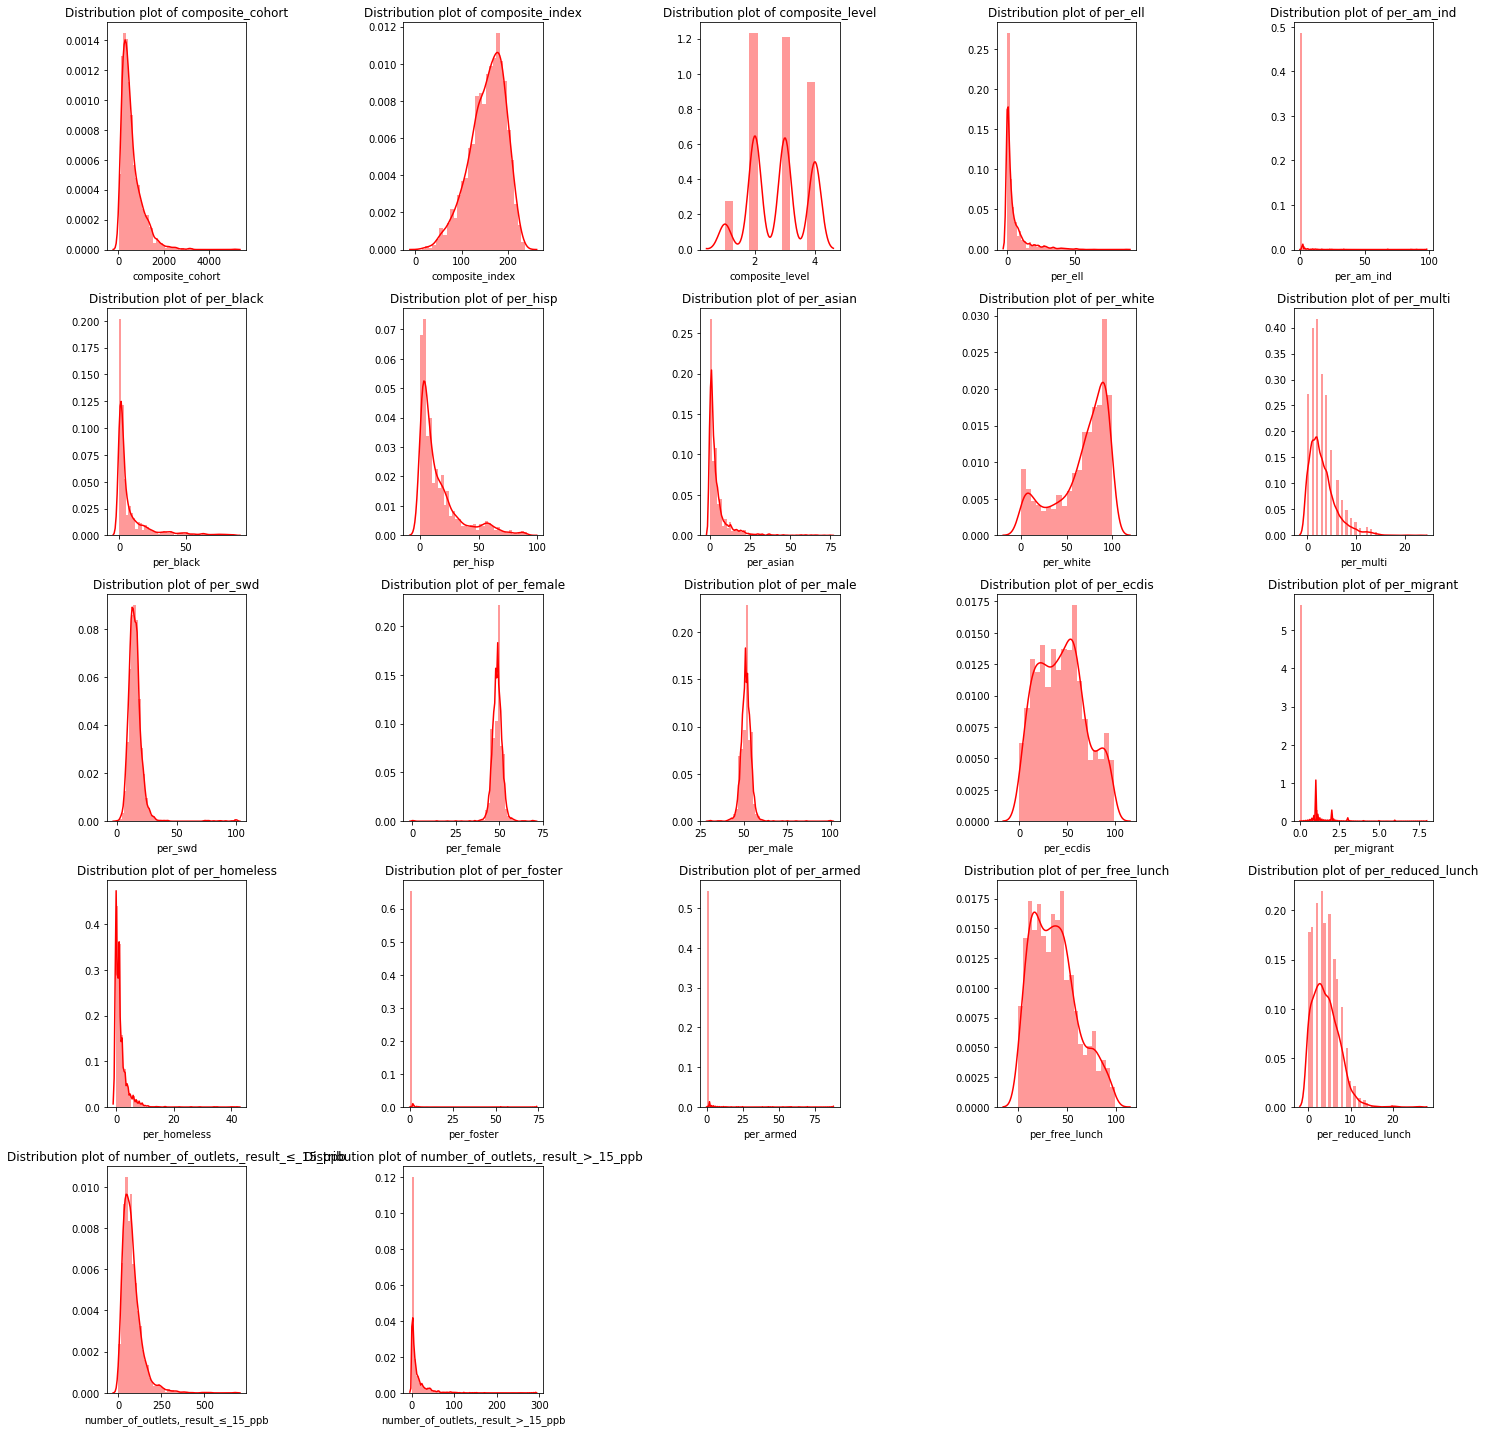

In [97]:
graphdistplt(merged_df7,numeric_columns4)

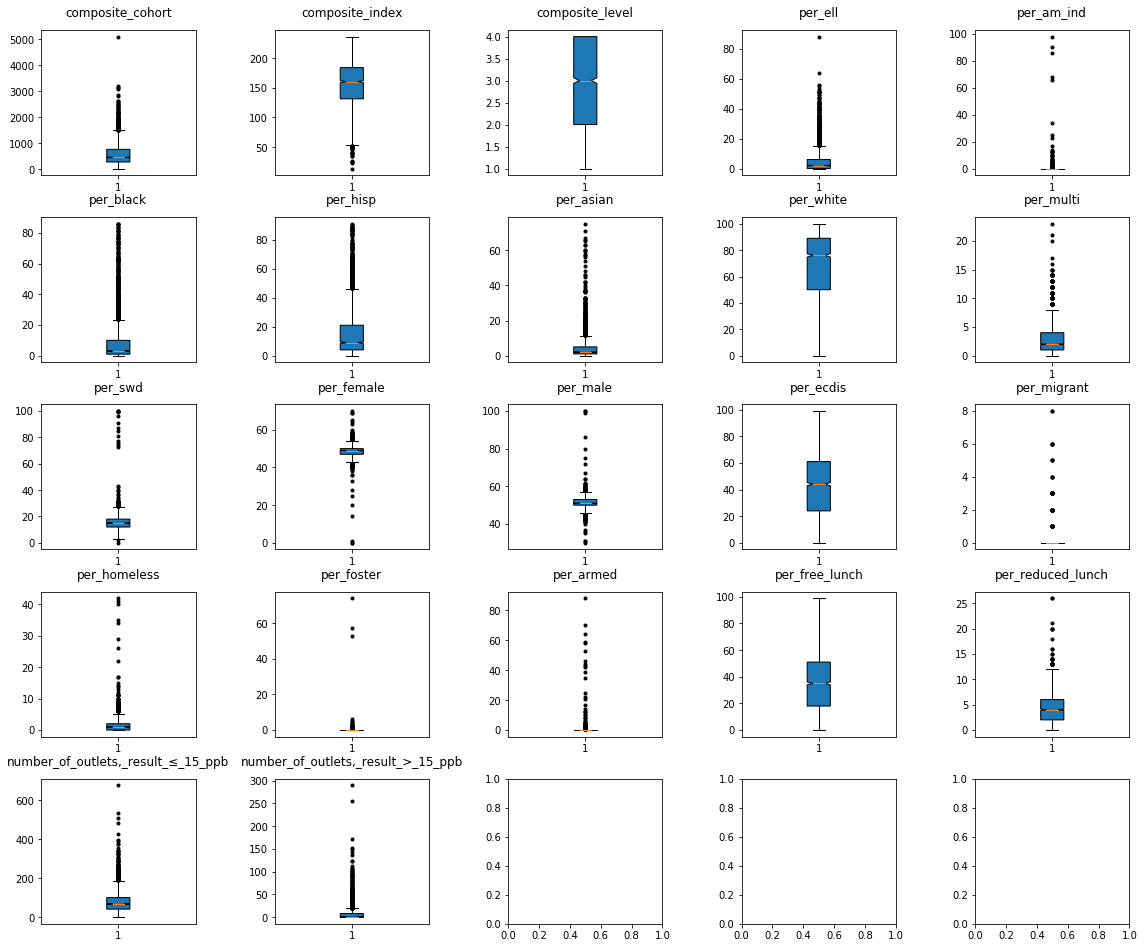

In [98]:
# visually inspect outliers  for each column
graphboxplt(merged_df7,numeric_columns4)

**NOTE ON OUTLIERS:** Though these graphs may show outliers in relation to where the majority of points lie, they are not outliers in terms of non-sensical data. For example, none of the percentage data incorrectly exceeds 100% or becomes negative. In some case, such as the number of outlets that are greater than 15 ppb for lead, removing these 'outliers' effectively would rid us of useful information since most of the data points are around 0.

In [99]:
# let's revisit our correlation matrix without the columns that begin with 'num_'. 
corr = merged_df7[numeric_columns4].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

We are curious to see if lead presence or absence correlates with composite level and with a cursory check of our correlation table, we see that the current two columns dealing with lead don't show much correlation at all. However, perhaps the data is not being compared properly. Let's make percentages out of these number of outlets results.

In [100]:
merged_df8 = merged_df7.copy()
merged_df8['total_outlets'] = (merged_df8['number_of_outlets,_result_≤_15_ppb'] + merged_df8['number_of_outlets,_result_>_15_ppb'])
merged_df8['lead_neg'] = merged_df8['number_of_outlets,_result_≤_15_ppb']/merged_df8['total_outlets']
merged_df8['lead_pos'] = merged_df8['number_of_outlets,_result_>_15_ppb']/merged_df8['total_outlets']

In [101]:
# Additionally, let's make a new column that combines the percentage of students that receive either free or reduced lunch
# This column can serve as a readout for poverty or economic disadvantage.
merged_df9 = merged_df8.copy()
merged_df9['free_or_red_lunch'] = merged_df9['per_free_lunch'] + merged_df9['per_reduced_lunch']
merged_df9

entity_cd                             entity_name  year   subject  \
1     100501040003  TACONIC HILLSJUNIOR/SENIOR HIGH SCHOOL  2018  Combined   
2     140201060002             AMHERST CENTRAL HIGH SCHOOL  2018  Combined   
3     100902040004    GERMANTOWN JUNIOR-SENIOR HIGH SCHOOL  2018  Combined   
4     101001040002                     CHATHAM HIGH SCHOOL  2018  Combined   
5     101300010001        HUDSON JUNIOR/SENIOR HIGH SCHOOL  2018  Combined   
...            ...                                     ...   ...       ...   
2438  671201060001                 PERRY ELEMENTARY SCHOOL  2018  Combined   
2439  671501040001                WARSAW ELEMENTARY SCHOOL  2018  Combined   
2440  680601060002                  PENN YAN MIDDLE SCHOOL  2018  Combined   
2441  680601060005              PENN YAN ELEMENTARY SCHOOL  2018  Combined   
2442  680801040002                DUNDEE ELEMENTARY SCHOOL  2018  Combined   

     subgroup_name  composite_cohort  composite_index  composite_level  \
1     All Students             424.0            174.4              3.0   
2     All Students             796.0            207.7              4.0   
3     All Students             224.0            189.5              3.0   
4     All Students             372.0            195.1              4.0   
5     All Students             480.0            166.9              2.0   
...            ...               ...              ...              ...   
2438  All Students             449.0            141.1              3.0   
2439  All Students             352.0            150.3              3.0   
2440  All Students             555.0            136.6              2.0   
2441  All Students             620.0            144.3              3.0   
2442  All Students             406.0            132.4              3.0   

      num_ell  per_ell  ...    county  school_city  school_zip_code  \
1          10        2  ...  Columbia   CRARYVILLE            12521   
2          22        3  ...      Erie      AMHERST            14226   
3           1        0  ...  Columbia   GERMANTOWN            12526   
4           5        1  ...  Columbia      CHATHAM            12037   
5          38        8  ...  Columbia       HUDSON            12534   
...       ...      ...  ...       ...          ...              ...   
2438        7        2  ...   Wyoming        PERRY            14530   
2439        5        1  ...   Wyoming       WARSAW            14569   
2440        0        0  ...     Yates         PENN            14527   
2441        8        1  ...     Yates         PENN            14527   
2442        0        0  ...     Yates       DUNDEE            14837   

      number_of_outlets,_result_≤_15_ppb  number_of_outlets,_result_>_15_ppb  \
1                                  130.0                                65.0   
2                                  156.0                                 0.0   
3                                   33.0                                12.0   
4                                   66.0                                 3.0   
5                                  173.0                                17.0   
...                                  ...                                 ...   
2438                                52.0                                 0.0   
2439                                55.0                                 0.0   
2440                                72.0                                 0.0   
2441                               300.0                                 0.0   
2442                                57.0                                 0.0   

               any_buildings_with_lead-free_plumbing?  total_outlets  \
1                                                  No          195.0   
2                                                  No          156.0   
3                                                  No           45.0   
4                                                  No           69.0   
5        

In [102]:
numeric_columns5 = numeric_columns4.tolist()
numeric_columns5.extend(('lead_neg','lead_pos', 'free_or_red_lunch'))

In [103]:
numeric_columns5

['composite_cohort',
 'composite_index',
 'composite_level',
 'per_ell',
 'per_am_ind',
 'per_black',
 'per_hisp',
 'per_asian',
 'per_white',
 'per_multi',
 'per_swd',
 'per_female',
 'per_male',
 'per_ecdis',
 'per_migrant',
 'per_homeless',
 'per_foster',
 'per_armed',
 'per_free_lunch',
 'per_reduced_lunch',
 'number_of_outlets,_result_≤_15_ppb',
 'number_of_outlets,_result_>_15_ppb',
 'lead_neg',
 'lead_pos',
 'free_or_red_lunch']

In [104]:
# let's revisit our correlation matrix with these new added columns. 
corr = merged_df9[numeric_columns5].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

We have two targets we can follow to see features that predict a school's performance. We can follow the continuous variable composite_index or we can follow composite_level which provides more of a summarized rating of the school and serves as a categorical target. For now, we will look at the continuous variable **'composite_index'.**

The correlation table also helps us to know which variables to not include redundantly. Where correlations are too high between variables (>90), we need to recognize if the variables are referring to the same thing. In these cases, it is prudent to only pick one of those highly correlated variables. For example, from the table, we see the per_free_lunch and free_or_red_lunch both correlate highly with per_ecdis. This makes sense, since those who are *ec*onomically disadvantaged

In [105]:
# plt.rcParams['figure.figsize'] = [8.0, 6.0]
# plt.rcParams['figure.dpi'] = 80
# plt.rcParams['savefig.dpi'] = 100

# plt.rcParams['font.size'] = 12
# plt.rcParams['legend.fontsize'] = 'large'
# plt.rcParams['figure.titlesize'] = 'medium'

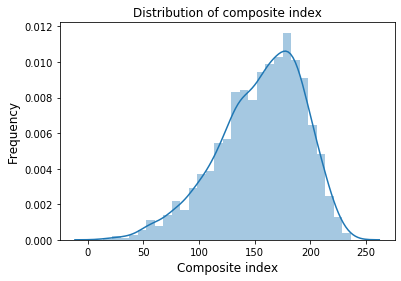

In [106]:
# check normality of distribution
sns.distplot((merged_df9.composite_index))
plt.title("Distribution of composite index")
plt.xlabel("Composite index", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [107]:
# normality test
# H0: null hypothesis is that the sample was drawn from a Gaussian distribution.
stat, p = normaltest(merged_df9.composite_index)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05         
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=128.515, p=0.000
Sample does not look Gaussian (reject H0)


In [108]:
# create a function that will make scatter plots for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphscatter (df, columns, z):
    rowlength = math.floor(math.sqrt(len(columns)))
    fig, axes = plt.subplots(nrows=rowlength+1, ncols=(rowlength+1), figsize=(16,16)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        axes[i].scatter(df[x], df[z], alpha=0.5) 
    fig.tight_layout()
    fig.subplots_adjust(top=0.8)
    plt.show()
    

In [109]:
# create a function that will make seaborn scatter plots with regression line for each numerical column in a dataframe
# function takes name of dataframe and list of numerical columns

def graphscattersns (df, columns, z):
    col_length = 5
    fig, axes = plt.subplots(nrows=len(columns)//col_length + 1, ncols=col_length, figsize=(64,64)) 
    axes = axes.flatten()

    for i,x in enumerate (columns):
        axes[i].set_title("\n".join(wrap(x,40))).set_y(1.05)
        sns.regplot(x = x, y = z, data = df, ax = axes[i]) # seaborn
    
    fig.tight_layout()
    fig.subplots_adjust(top=1)
    plt.show()
    

In [110]:
numeric_columns6 = numeric_columns5.copy()
numeric_columns6

['composite_cohort',
 'composite_index',
 'composite_level',
 'per_ell',
 'per_am_ind',
 'per_black',
 'per_hisp',
 'per_asian',
 'per_white',
 'per_multi',
 'per_swd',
 'per_female',
 'per_male',
 'per_ecdis',
 'per_migrant',
 'per_homeless',
 'per_foster',
 'per_armed',
 'per_free_lunch',
 'per_reduced_lunch',
 'number_of_outlets,_result_≤_15_ppb',
 'number_of_outlets,_result_>_15_ppb',
 'lead_neg',
 'lead_pos',
 'free_or_red_lunch']

In [111]:
# remove the target column from the current list of columns we may want to use for the model
numeric_columns5.remove('composite_index')
numeric_columns6

['composite_cohort',
 'composite_index',
 'composite_level',
 'per_ell',
 'per_am_ind',
 'per_black',
 'per_hisp',
 'per_asian',
 'per_white',
 'per_multi',
 'per_swd',
 'per_female',
 'per_male',
 'per_ecdis',
 'per_migrant',
 'per_homeless',
 'per_foster',
 'per_armed',
 'per_free_lunch',
 'per_reduced_lunch',
 'number_of_outlets,_result_≤_15_ppb',
 'number_of_outlets,_result_>_15_ppb',
 'lead_neg',
 'lead_pos',
 'free_or_red_lunch']

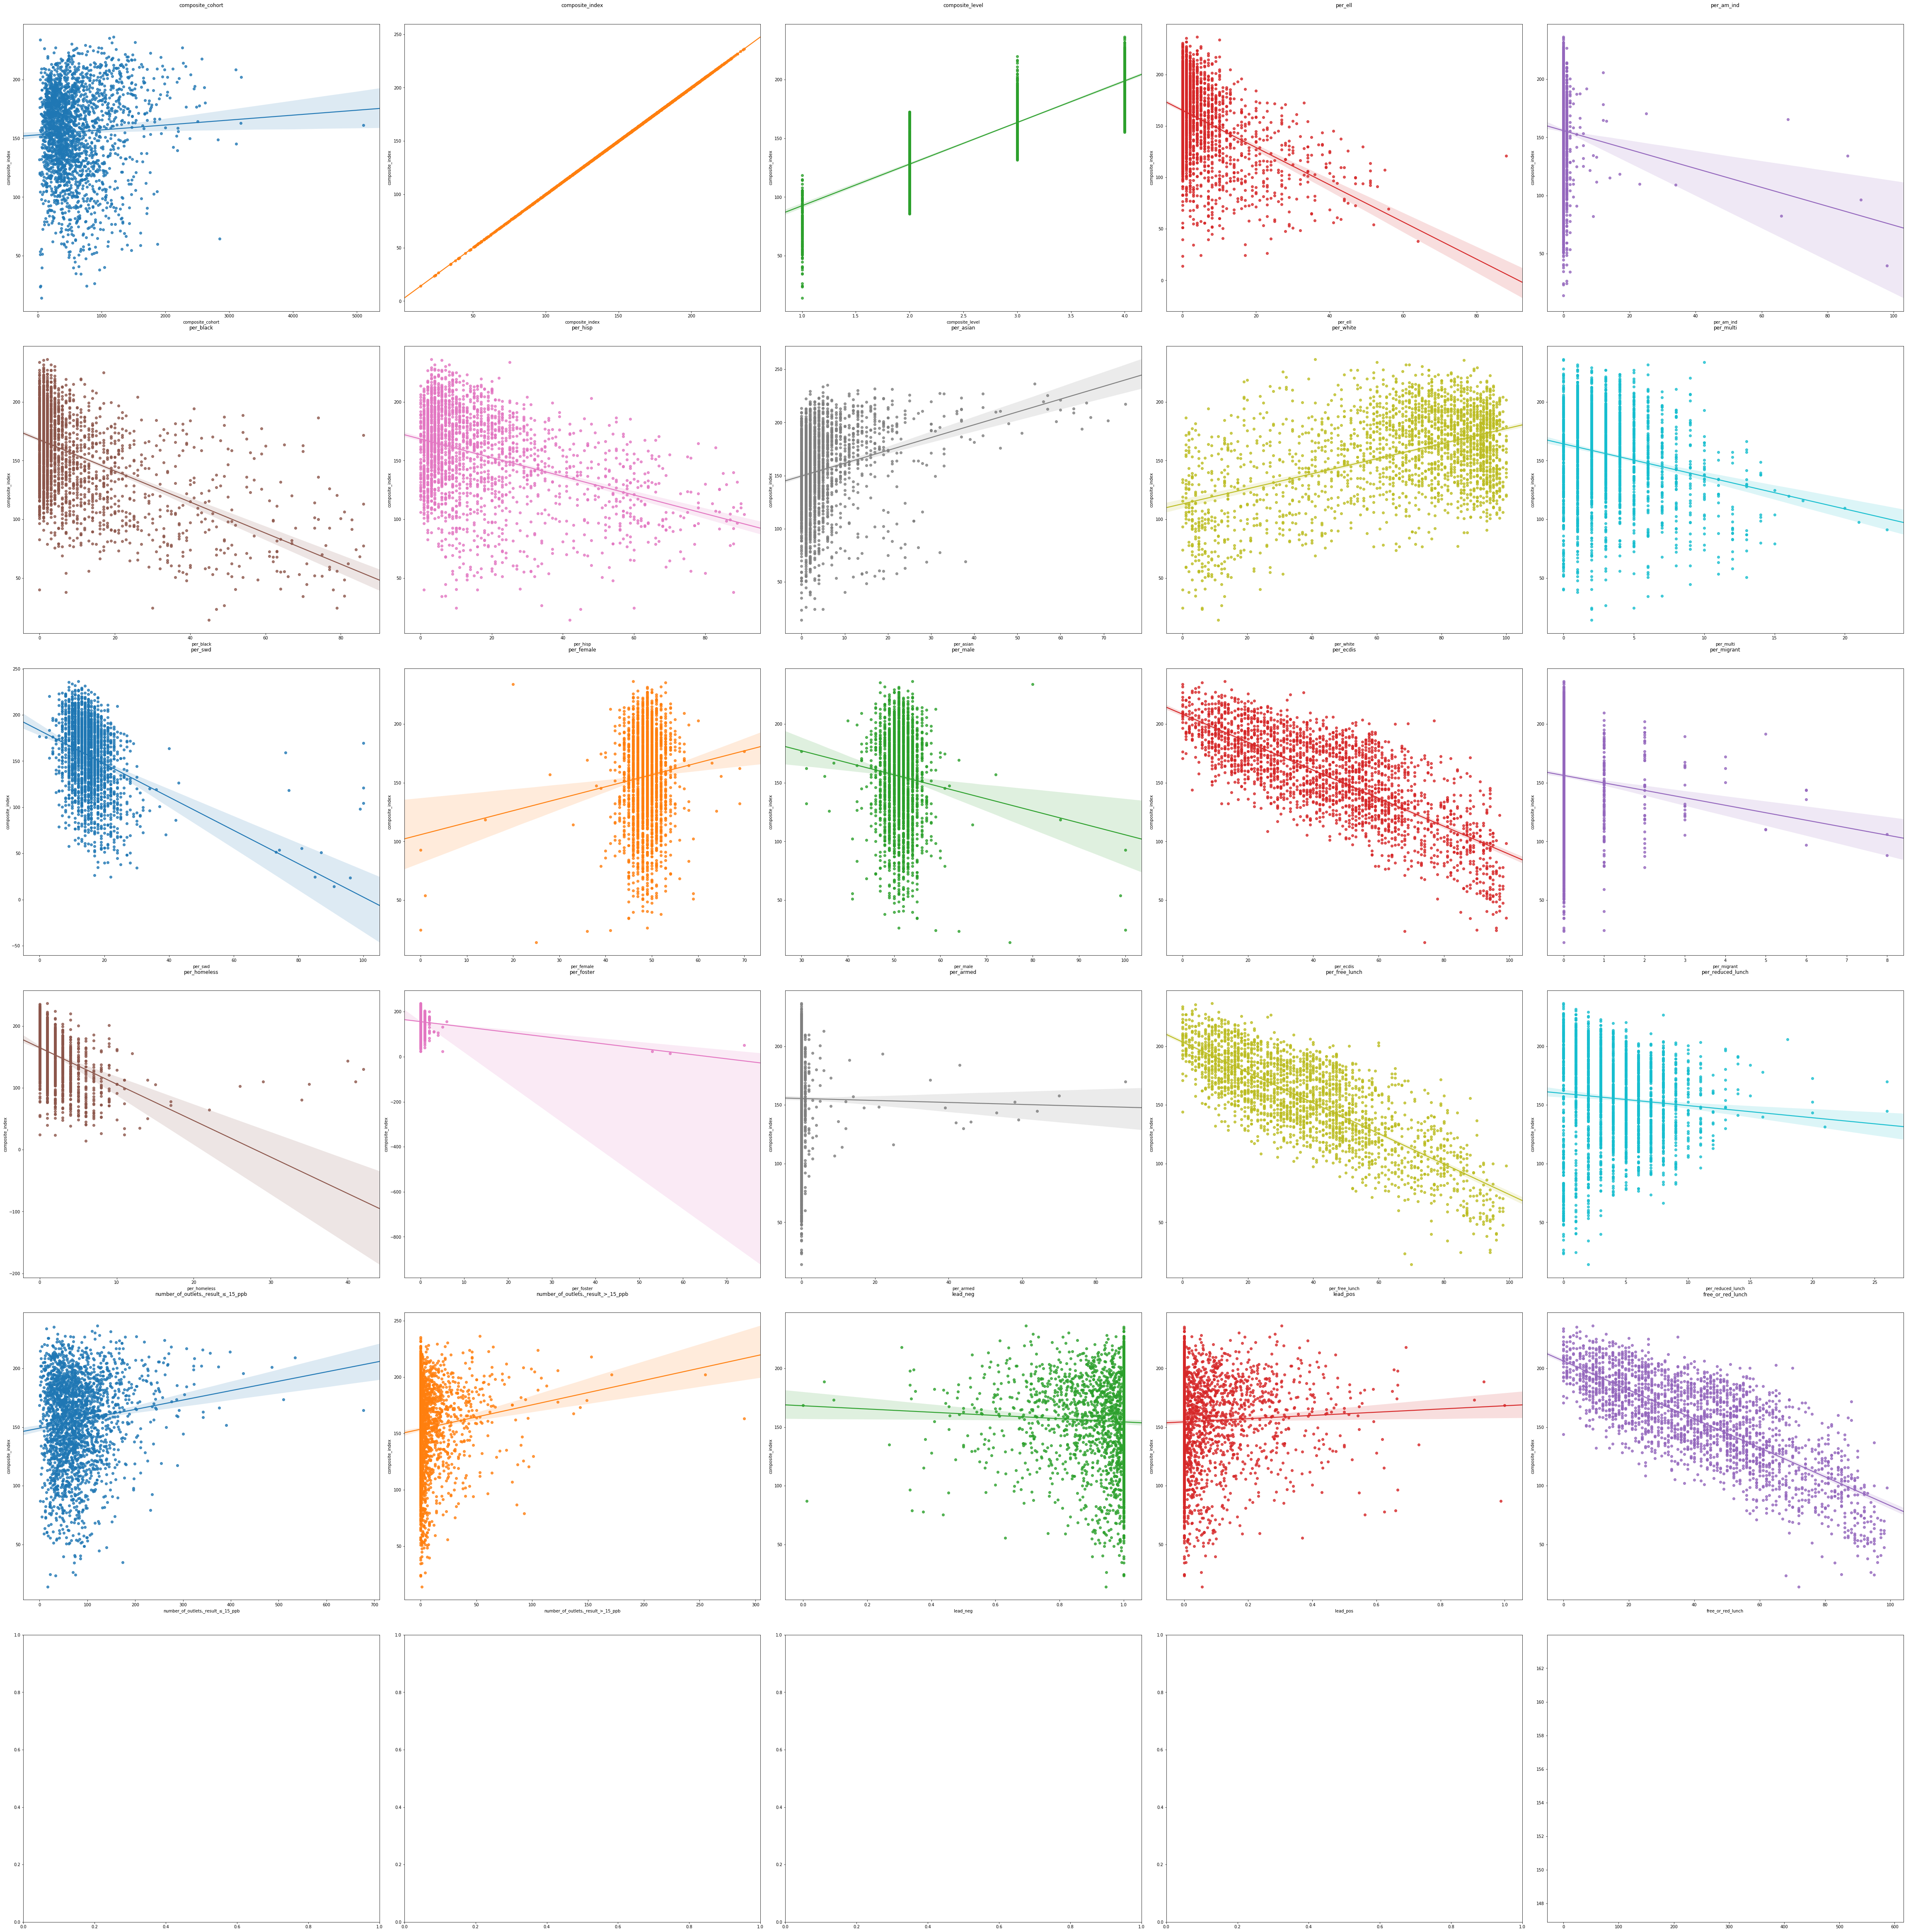

In [112]:
# graph the various numerical features vs. composite index
graphscattersns(merged_df9,numeric_columns6, 'composite_index')

In [113]:
# let's also look at the numerical correlation between potential feature variables and the target variable
# we sort the absolute values of the results; we prefer to pick features that are highly correlated 
# while also trying to avoid colinear variables
corr1 = merged_df9[numeric_columns5].corr().composite_level.abs().sort_values(ascending=False)
corr1

composite_level                       1.000000
per_free_lunch                        0.715240
per_ecdis                             0.708971
free_or_red_lunch                     0.708464
per_black                             0.443565
per_white                             0.403319
per_homeless                          0.378896
per_hisp                              0.346514
per_ell                               0.343097
per_swd                               0.334425
per_asian                             0.258328
per_reduced_lunch                     0.130786
per_migrant                           0.100411
per_foster                            0.089813
per_multi                             0.089381
per_am_ind                            0.077560
number_of_outlets,_result_≤_15_ppb    0.067702
number_of_outlets,_result_>_15_ppb    0.065068
per_male                              0.053861
per_female                            0.053775
composite_cohort                      0.037025
lead_neg     

## 5. Supervised Learning Model

From the correlation matrix, along with a visualization of that correlation in scatterplots, we select some numerical geatures that we feel would serve our model. Whereas going with columns that had high correlation may be a suitable way to make a model, we had to consider if one feature was represented by multiple columns. For example, poverty or having some kind of economic difficultly could be seen in a variety of columns: per_free_lunch,per_ecdis, and free_or_red_lunch. Since percent of free lunch recipients is directly dependent on household income, we realize it would be the same measure as percent *ec*onomically *dis*advantaged. 

Similarly, lead_neg and lead_pos convey the same information so one of those columns in the model would suffice. The same is true for per_male and per_female; one column suffices the information for both columns.

Normally, one may also include non-numerical column data as part of the model; hoever, our non-numerical columns don't provide useful data upon examination with bar graphs (these have since been removed since the graphs were not informative).

### OLS Regression

In [114]:
# Y is the target variable
Y = merged_df8['composite_index']
# X is the feature set which includes
# numerical features
# for our first model, we chose: 
### percent english language learner (per_ell); reflects language capability
### percent white (per_white): informative of white vs other minority groups
### percent homeless (per_homeless): informative of housing condition and may also reflect economic circumstance
### percent economically disadvantaged (per_ecdis): informative of poverty and free lunch status
### percent of outlet pipes without lead in a building (lead_neg): reflects lead in drinking water

X = merged_df8[['per_ell','per_white','per_homeless','per_ecdis','lead_neg']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-0.10531453  0.08717959 -0.52179246 -1.09183727 -9.70339076]

Intercept: 
 208.53055967373913


In [115]:
# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        composite_index   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     736.6
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:25:27   Log-Likelihood:                -11072.
No. Observations:                2407   AIC:                         2.216e+04
Df Residuals:                    2401   BIC:                         2.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          208.5306      4.602     45.313      0.000     199.506     217.555
per_ell         -0.1053      0.078     -1.352      0.176      -0.258       0.047
per_white        0.0872      0.025      3.445      0.001       0.038       0.137
per_homeless    -0.5218      0.209     -2.498      0.013      -0.931      -0.112
per_ecdis       -1.0918      0.025    -42.869      0.000      -1.142      -1.042
lead_neg        -9.7034      4.048     -2.397      0.017     -17.641      -1.766
==============================================================================
Omnibus:                        6.835   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.592
Skew:                          -0.016   Prob(JB):                       0.0611
Kurtosis:                       2.766   Cond. No.                         986.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's drop per_ell since it does not show significance in contributing to the model.

In [116]:
# Y is the target variable
Y = merged_df8['composite_index']
# X is the feature set which includes
# numerical features
# for our revised model, we chose: 
### percent white (per_white): informative of white vs other minority groups
### percent homeless (per_homeless): informative of housing condition and may also reflect economic circumstance
### percent economically disadvantaged (per_ecdis): informative of poverty and free lunch status
### percent of outlet pipes without lead in a building (lead_neg): reflects lead in drinking water

X = merged_df8[['per_white','per_homeless','per_ecdis','lead_neg']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 0.10683216 -0.55055513 -1.09594435 -9.81679923]

Intercept: 
 206.99986214044554


In [117]:
# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

#Here we will see simple linear regression with OLS (ordinary least squares)
results.summary()

/Users/Mahfuz-Tamim/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        composite_index   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     920.0
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:25:27   Log-Likelihood:                -11073.
No. Observations:                2407   AIC:                         2.216e+04
Df Residuals:                    2402   BIC:                         2.218e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          206.9999      4.461     46.398      0.000     198.251     215.749
per_white        0.1068      0.021      5.156      0.000       0.066       0.147
per_homeless    -0.5506      0.208     -2.649      0.008      -0.958      -0.143
per_ecdis       -1.0959      0.025    -43.332      0.000      -1.146      -1.046
lead_neg        -9.8168      4.047     -2.425      0.015     -17.754      -1.880
==============================================================================
Omnibus:                        7.975   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.345
Skew:                          -0.004   Prob(JB):                       0.0419
Kurtosis:                       2.749   Cond. No.                         976.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### KNN Regression

In [122]:
# How about KNN regression?

from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = merged_df9[['per_white','per_homeless','per_ecdis','lead_neg']]
Y = merged_df9['composite_index']
knn.fit(X, Y)

score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

# Set up our prediction line.
#T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
#Y_ = knn.predict(T)

#plt.scatter(X, Y, c='k', label='data')
#plt.plot(T, Y_, c='g', label='prediction')
#plt.legend()
#plt.title('K=10, Unweighted')
#plt.show()

Accuracy: 0.22 (+/- 1.41)


22% isn't too high of a metric for this model. OLS seems to do a better job at modeling.'

### Reflections on models

Our OLS model is able to explain about 60% of the variance in the data with the four features we've chosen to include. Most interesting for us was the lead_neg (referring to the percentage of pipes that did not have lead in a particular building) had a negative coefficient associated with it. This is counterintuitive as research has previously shown that even low levels of exposure to lead can lead to cognitive deficits. We had anticipated that this would be reflected with lower perfomance for schools. However, the model would suggest that the schools that had lead in pipes did better, performance-wise, despite the presence of this toxic metal.

In [ ]:
# k-fold cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

In [ ]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [ ]:
# does Lasso regression get us better numbers?
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [ ]:
# does Ridge regression get us better numbers?
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [ ]:
# does ElasticNet regression get us better numbers?
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

We note that all four regression types give roughly similar R values; going strictly by the numbers, standard OLS regression seems to do the best job.

## 6. Summary of Results

In summary, four features were extracted from the many available features. We successfully avoided using too many variables which may improve the model but would complicate it as well. We avoided using variables that may have been colinear. 

The four features we chose were 'per_white','per_homeless','per_ecdis','lead_neg'. These features reflect ethnicity, home status, economic status and lead presence, respectively. Our model is able to explain approximately 60% of the variance in the data which these four measures. Overall, we reaffirm that socioeconomic conditions are highly predictive of school performance. Interestingly, lead data did not fall out as a useful feature (like how per_ell did) even though the correlation matrix showed very low correlation between lead data and school performance. We have two take aways from this: our correlation matrix data informs us that lead presence or absence did not correlate much at all with school performance in terms of overall composite_index. On the flip side, we were surprised to see that our model saw a positive relationship with lead presence. That is to say, when schools would have higher perfecentages of lead present in their pipes, school performance would go up; this is noted from the negative coefficient we see for variable lead_neg. There are other factors that may also help to predict school performance, which requires further study. 

Pros and Cons of the Datasets:
Pros: 
- we were able to join many datasets on a consistent BEDS code for each institution
- relatively large tables
- relatively clean

Cons: 
- lots of institutions didn't seem to have lead data. We had more than 5000 schools in our master list but upon merging school data with lead data, we lost about a half of our entries. 
- Only a small aspect of lead presence is noted in the data (whether lead does or does not exist above or below 15 ppb). More discreet data may have helped to parse our a better relationship between school data and lead data.
- school performance data could have been more discreet instead of solely relying on standardized tests